# University Ranking Analysis

Analysis is done for the rankings given by 
- Times Higher Education (THE)
- Center for World University Rankings (CWUR)

Analysis has been done in order to find the factors that drive their universities' ranking and also to compare their output.


Major insights from the analysis:
* CWUR ranking is highly based on quality of education, quality of faculty, citations and influence. Other variables used in CWUR ranking like patents, publications and alumni employment also affect world ranking.
* THE ranking is mainly determined by teaching, research and citations.THE ranking also lists female male ration, student staff ratio and number of students but these factors do not have much effect on ranking.
* Both CWUR and THE rankings have many institutions from USA, UK, Japan, France, Germany and China in their list.
* If we consider just the top 10 institutes then most of the institutes are form the USA followed by UK for most of the factors. For few factors institutes from Japan, Fance and Netheralnds are also in top 10 institutes. Massachusetts Institute of Technology, Harvard University, Stanford University and Princeton University in USA; University of Oxford and University of Cambridge in UK have been consitently in the top. 

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
times_data = pd.read_csv('C:/Users/Vijaya/Data Science/Viz/University_data/timesData.csv')
shanghai_data = pd.read_csv('C:/Users/Vijaya/Data Science/Viz/University_data/shanghaiData.csv')
cwur_data = pd.read_csv('C:/Users/Vijaya/Data Science/Viz/University_data/cwurData.csv')

# CWUR Ranking Analysis

In [3]:
cwur_data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
cwur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


In [5]:
cwur_data.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [6]:
cwur_data.shape

(2200, 14)

In [7]:
cwur_data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [8]:
cwur_data.year.unique()

array([2012, 2013, 2014, 2015], dtype=int64)

## Ranking of universities per year

CWUR started ranking the universities in 2012. Years 2012 and 2013 had top 100 universities rated. From year 2014 1000 universities are being rated

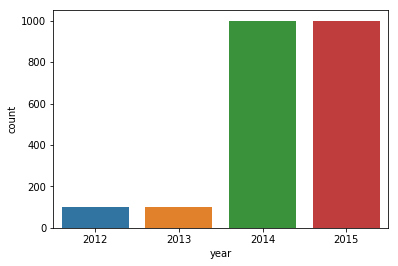

In [9]:
sns.countplot(x='year',data=cwur_data)

## Countries having top universities

All 4 years (2012-2015) it is the USA which has the maximum number of top universities in the world. It is followed by United Kingdom in years 2012-13 and by China in years 2014-15. So, among top 100 United Kingdom has more universities than China but among top 1000 China has more universities. China is a huge country as compared to United Kingdom both in terms of area and poulation. Other countries having top rated universities are Japan, France, Germany and Israel.

In [10]:
cntry_inst_2012 = cwur_data[cwur_data['year']==2012]['country'].value_counts().head(15)
cntry_inst_2012 = pd.DataFrame(cntry_inst_2012)
cntry_inst_2012.rename(columns={'country': 'count'}, inplace=True)
cntry_inst_2012['country'] = cntry_inst_2012.index

cntry_inst_2013 = cwur_data[cwur_data['year']==2013]['country'].value_counts().head(15)
cntry_inst_2013 = pd.DataFrame(cntry_inst_2013)
cntry_inst_2013.rename(columns={'country': 'count'}, inplace=True)
cntry_inst_2013['country'] = cntry_inst_2013.index

cntry_inst_2014 = cwur_data[cwur_data['year']==2014]['country'].value_counts().head(15)
cntry_inst_2014 = pd.DataFrame(cntry_inst_2014)
cntry_inst_2014.rename(columns={'country': 'count'}, inplace=True)
cntry_inst_2014['country'] = cntry_inst_2014.index

cntry_inst_2015 = cwur_data[cwur_data['year']==2015]['country'].value_counts().head(15)
cntry_inst_2015 = pd.DataFrame(cntry_inst_2015)
cntry_inst_2015.rename(columns={'country': 'count'}, inplace=True)
cntry_inst_2015['country'] = cntry_inst_2015.index



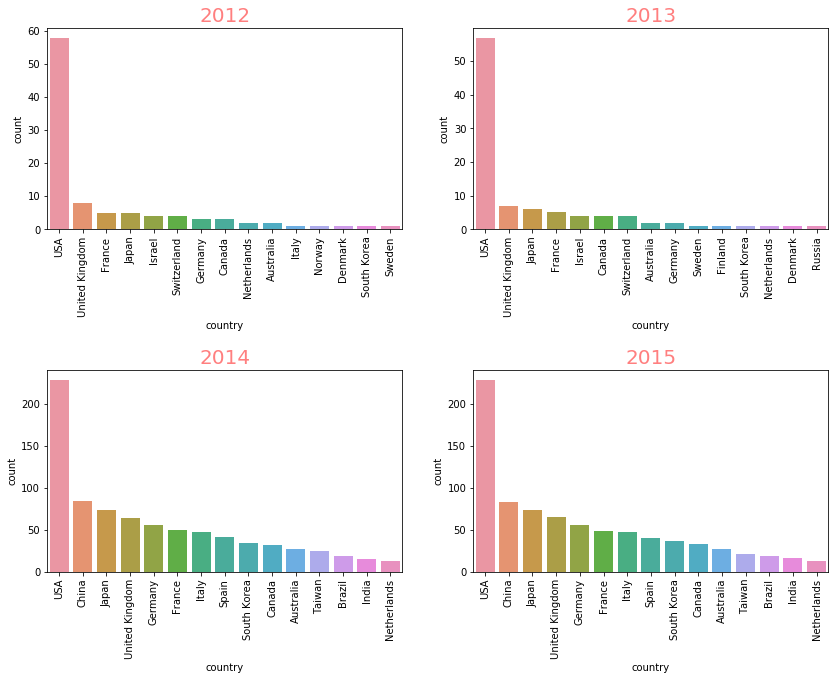

In [11]:
# Country wise institutions ranked count
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
plt.subplots_adjust(hspace=0.7)

g = sns.barplot(x='country',y='count',data=cntry_inst_2012, ax=ax1)
g.axes.set_title('2012', fontsize=20,color="r",alpha=0.5)
for item in g.get_xticklabels():
    item.set_rotation(90)

h = sns.barplot(x='country',y='count',data=cntry_inst_2013, ax=ax2)
h.axes.set_title('2013', fontsize=20,color="r",alpha=0.5)
for item in h.get_xticklabels():
    item.set_rotation(90)
    
i = sns.barplot(x='country',y='count',data=cntry_inst_2014, ax=ax3)
i.axes.set_title('2014', fontsize=20,color="r",alpha=0.5)
for item in i.get_xticklabels():
    item.set_rotation(90)
    
j = sns.barplot(x='country',y='count',data=cntry_inst_2015, ax=ax4)
j.axes.set_title('2015', fontsize=20,color="r",alpha=0.5)
for item in j.get_xticklabels():
    item.set_rotation(90)

## Countries having top rated universities in patents

These graphs are produced by averaging the patents rating i.e. sum of rating for all the institutions of a country per year divided by number of institutions for that country that got ranked.
Countries like Singapore, Israel, Malaysia and Denmark are in top while rating for patents as there are only couple of institutions for these countries and they are ranked in top 100.

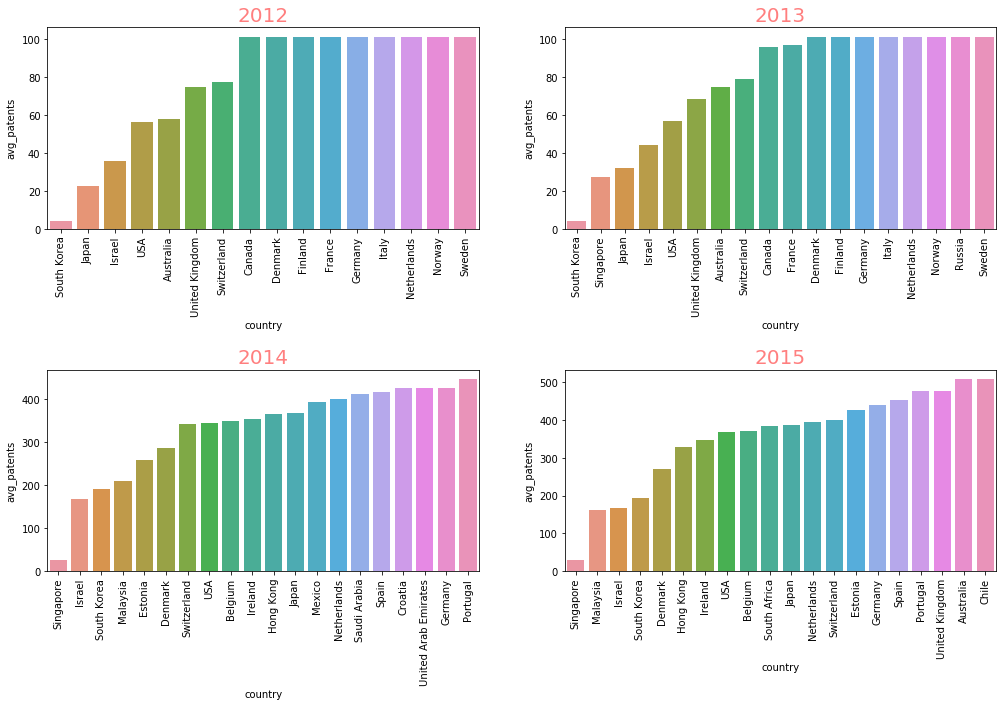

In [12]:
# Country wise average patents ranking per institute
ctry_patents_avg = cwur_data.groupby(['year','country'])['patents'].mean()
ctry_patents_avg = pd.DataFrame(ctry_patents_avg)
ctry_patents_avg = ctry_patents_avg.reset_index()
ctry_patents_avg = ctry_patents_avg.sort_values(['year','patents'])
ctry_patents_avg = ctry_patents_avg.rename(columns = {'patents':'avg_patents'})

fig = plt.figure(figsize=(17,10))
ax = []
ax.append(fig.add_subplot(221))
ax.append(fig.add_subplot(222))
ax.append(fig.add_subplot(223))
ax.append(fig.add_subplot(224))
plt.subplots_adjust(hspace=0.7)

years = cwur_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_patents',data=ctry_patents_avg[ctry_patents_avg['year'] == y].head(20), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries having top education quality

Countries like Russia, Switzerland, Lebanon, Bulgaria and Belgium have instititions that are rated highly in quality of education. These have only few institutions and they are ranking high due to which they are rated highly. 
USA, United Kingdom, France and Germany are other countries that have many instututions and are rated high for quality of education. 


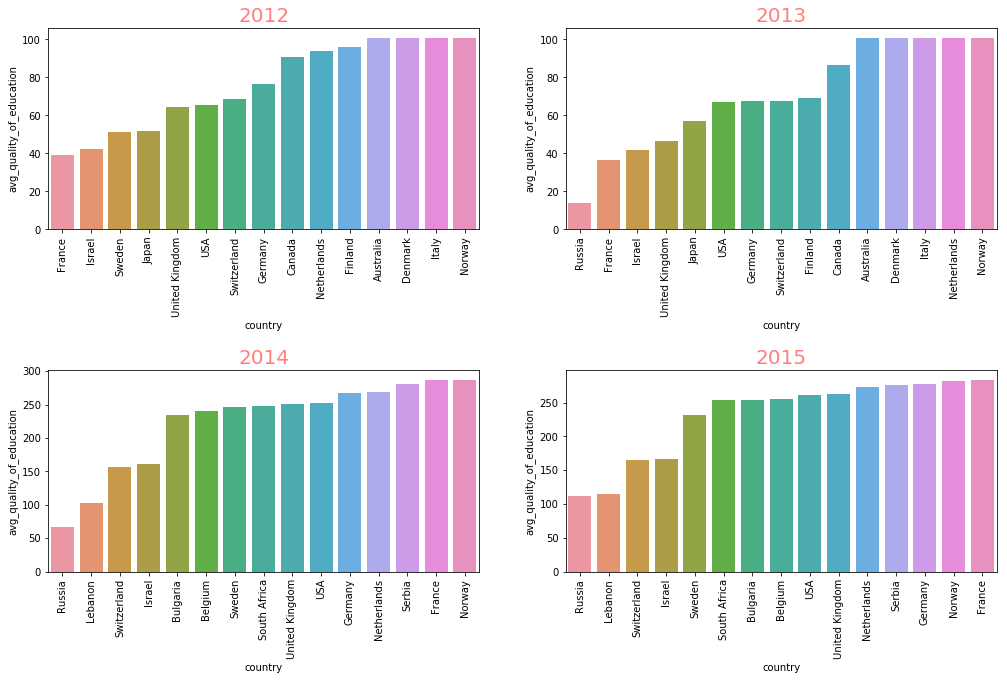

In [13]:
# Country wise average quality of education per institute
ctry_qoe_avg = cwur_data.groupby(['year','country'])['quality_of_education'].mean()
ctry_qoe_avg = pd.DataFrame(ctry_qoe_avg)
ctry_qoe_avg = ctry_qoe_avg.reset_index()
ctry_qoe_avg = ctry_qoe_avg.sort_values(['year','quality_of_education'])
ctry_qoe_avg = ctry_qoe_avg.rename(columns = {'quality_of_education':'avg_quality_of_education'})

fig = plt.figure(figsize=(17,10))
ax = []
ax.append(fig.add_subplot(221))
ax.append(fig.add_subplot(222))
ax.append(fig.add_subplot(223))
ax.append(fig.add_subplot(224))
plt.subplots_adjust(hspace=0.7)

years = cwur_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_quality_of_education',data=ctry_qoe_avg[ctry_qoe_avg['year'] == y].head(15), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries having top alumni employment

Countries like South Africa, Colombia, Lebanon and Russia have instititions that are rated highly in alumni employment. These have only few institutions and they are ranking high due to which they are rated highly. USA, United Kingdom and Canada are other countries that have many instututions and are rated high for alumni employment. 

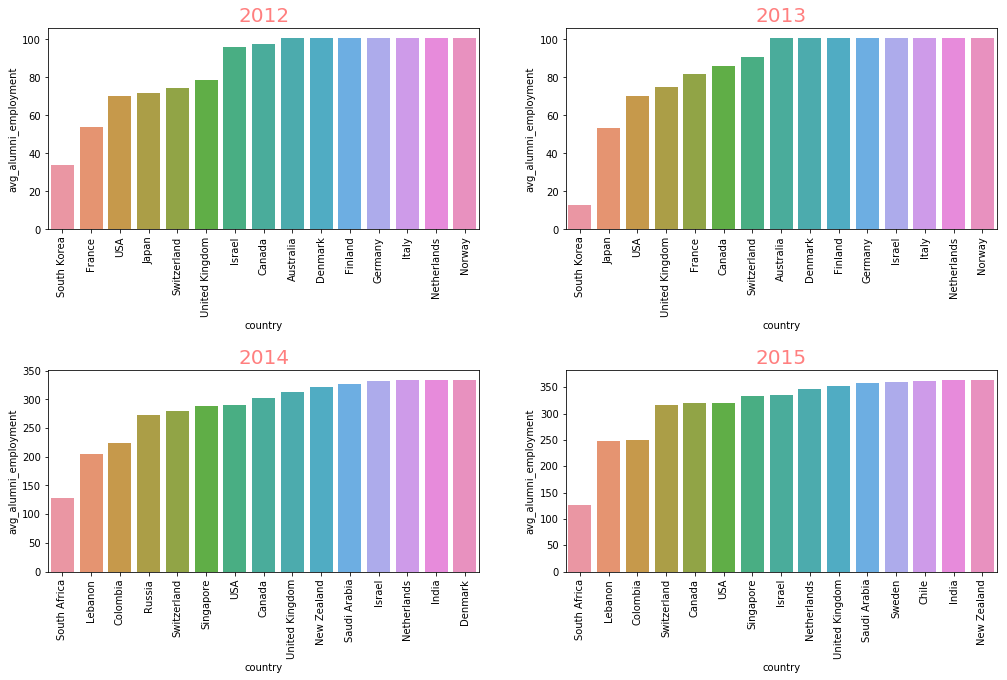

In [14]:
# Country wise average alumni employment per institute
ctry_alEmp_avg = cwur_data.groupby(['year','country'])['alumni_employment'].mean()
ctry_alEmp_avg = pd.DataFrame(ctry_alEmp_avg)
ctry_alEmp_avg = ctry_alEmp_avg.reset_index()
ctry_alEmp_avg = ctry_alEmp_avg.sort_values(['year','alumni_employment'])
ctry_alEmp_avg = ctry_alEmp_avg.rename(columns = {'alumni_employment':'avg_alumni_employment'})

fig = plt.figure(figsize=(17,10))
ax = []
ax.append(fig.add_subplot(221))
ax.append(fig.add_subplot(222))
ax.append(fig.add_subplot(223))
ax.append(fig.add_subplot(224))
plt.subplots_adjust(hspace=0.7)

years = cwur_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_alumni_employment',data=ctry_alEmp_avg[ctry_alEmp_avg['year'] == y].head(15), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries having top faculty quality

Countries like Israel, Switzerland, Sweden Denmark and Norway have instititions that are rated highly in quality of faculty. These have only few institutions and they are ranking high due to which they are rated highly. USA and United Kingdom are other countries that have many instututions and are rated high for faculty quality.

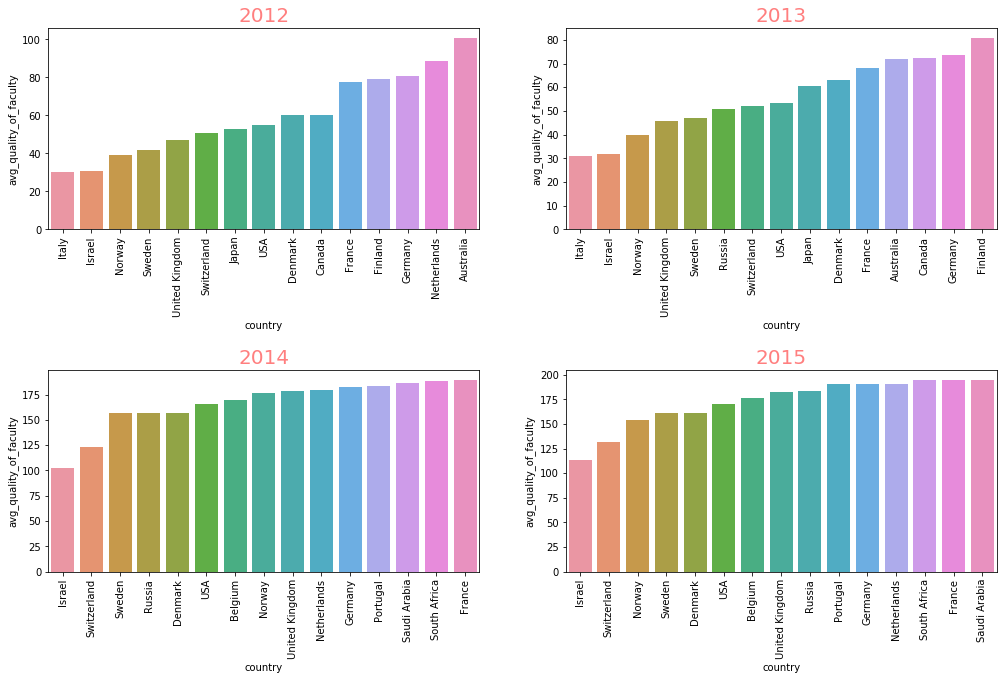

In [15]:
# Country wise average quality_of_faculty per institute
ctry_qof_avg = cwur_data.groupby(['year','country'])['quality_of_faculty'].mean()
ctry_qof_avg = pd.DataFrame(ctry_qof_avg)
ctry_qof_avg = ctry_qof_avg.reset_index()
ctry_qof_avg = ctry_qof_avg.sort_values(['year','quality_of_faculty'])
ctry_qof_avg = ctry_qof_avg.rename(columns = {'quality_of_faculty':'avg_quality_of_faculty'})

fig = plt.figure(figsize=(17,10))
ax = []
ax.append(fig.add_subplot(221))
ax.append(fig.add_subplot(222))
ax.append(fig.add_subplot(223))
ax.append(fig.add_subplot(224))
plt.subplots_adjust(hspace=0.7)

years = cwur_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_quality_of_faculty',data=ctry_qof_avg[ctry_qof_avg['year'] == y].head(15), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in publications

Countries like Singapore, Netherlands, Sweden, Denmark and Hong Kong have instititions that are rated highly in publications. These have only few institutions and they are ranking high due to which they are rated highly. USA and Canada are other countries that have many instututions and are rated high for publications. 

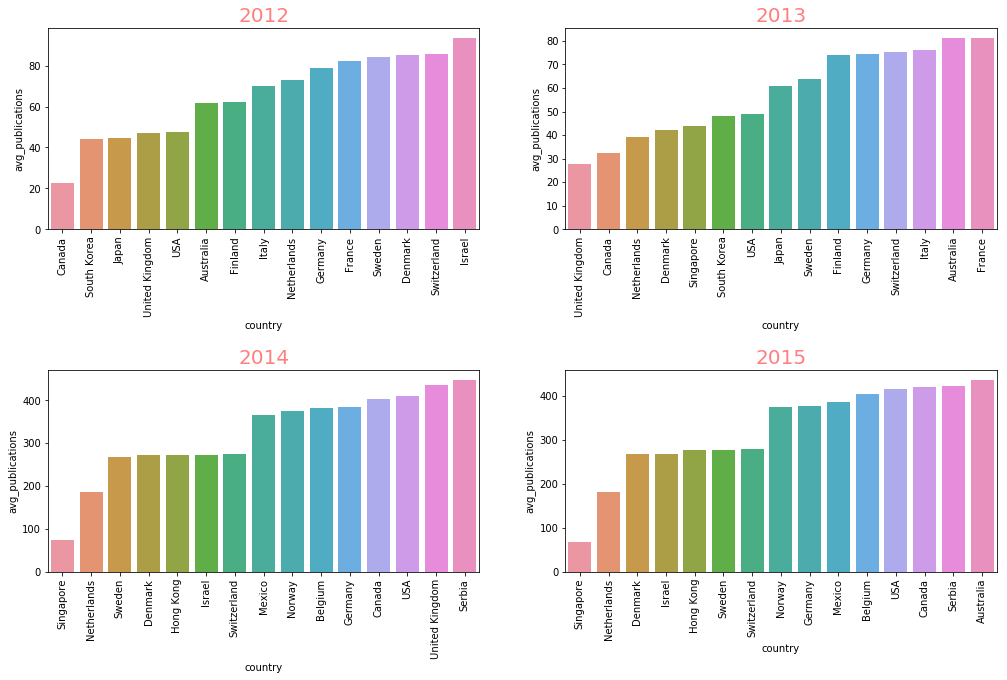

In [16]:
# Country wise average publications per institute
ctry_publications_avg = cwur_data.groupby(['year','country'])['publications'].mean()
ctry_publications_avg = pd.DataFrame(ctry_publications_avg)
ctry_publications_avg = ctry_publications_avg.reset_index()
ctry_publications_avg = ctry_publications_avg.sort_values(['year','publications'])
ctry_publications_avg = ctry_publications_avg.rename(columns = {'publications':'avg_publications'})

fig = plt.figure(figsize=(17,10))
ax = []
ax.append(fig.add_subplot(221))
ax.append(fig.add_subplot(222))
ax.append(fig.add_subplot(223))
ax.append(fig.add_subplot(224))
plt.subplots_adjust(hspace=0.7)

years = cwur_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_publications',data=ctry_publications_avg[ctry_publications_avg['year'] == y].head(15), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in citations

Countries like Singapore, Netherlands, Sweden, Denmark and Switzerlans have instititions that are rated highly in citations. These have only few institutions and they are ranking high due to which they are rated highly. USA, United Kingdom and Canada are other countries that have many instututions and are rated high for citations. 

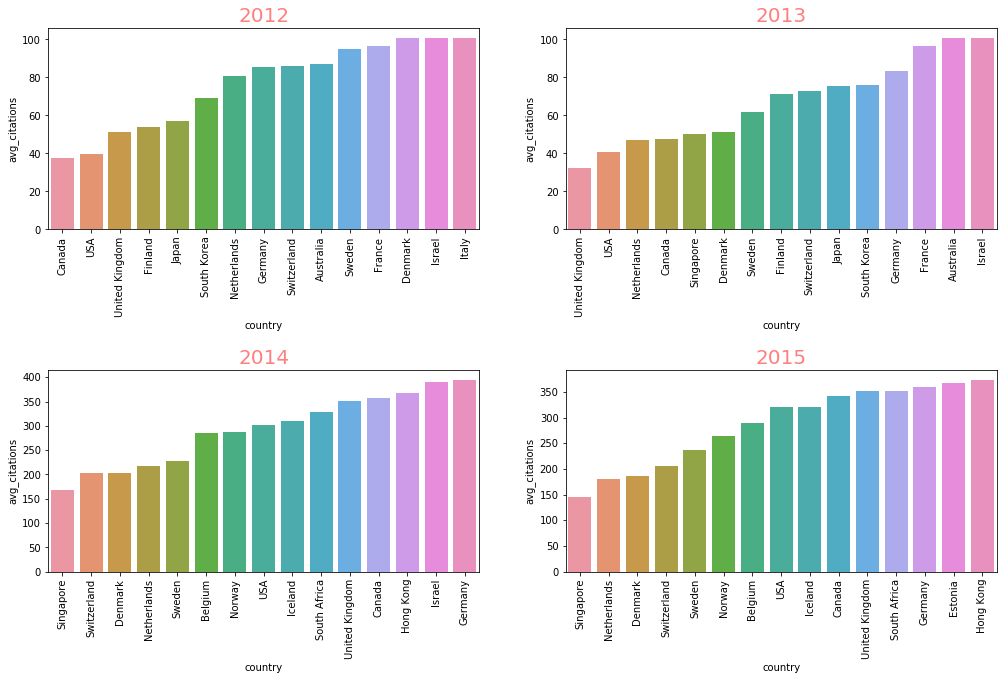

In [17]:
# Country wise average citations per institute
ctry_citations_avg = cwur_data.groupby(['year','country'])['citations'].mean()
ctry_citations_avg = pd.DataFrame(ctry_citations_avg)
ctry_citations_avg = ctry_citations_avg.reset_index()
ctry_citations_avg = ctry_citations_avg.sort_values(['year','citations'])
ctry_citations_avg = ctry_citations_avg.rename(columns = {'citations':'avg_citations'})

fig = plt.figure(figsize=(17,10))
ax = []
ax.append(fig.add_subplot(221))
ax.append(fig.add_subplot(222))
ax.append(fig.add_subplot(223))
ax.append(fig.add_subplot(224))
plt.subplots_adjust(hspace=0.7)

years = cwur_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_citations',data=ctry_citations_avg[ctry_citations_avg['year'] == y].head(15), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in influence

Countries like Singapore, Netherlands, Sweden, Israel and Switzerland have instititions that are rated highly in influence. These have only few institutions and they are ranking high due to which they are rated highly. USA and United Kingdom are other countries that have many instututions and are rated high for influence.

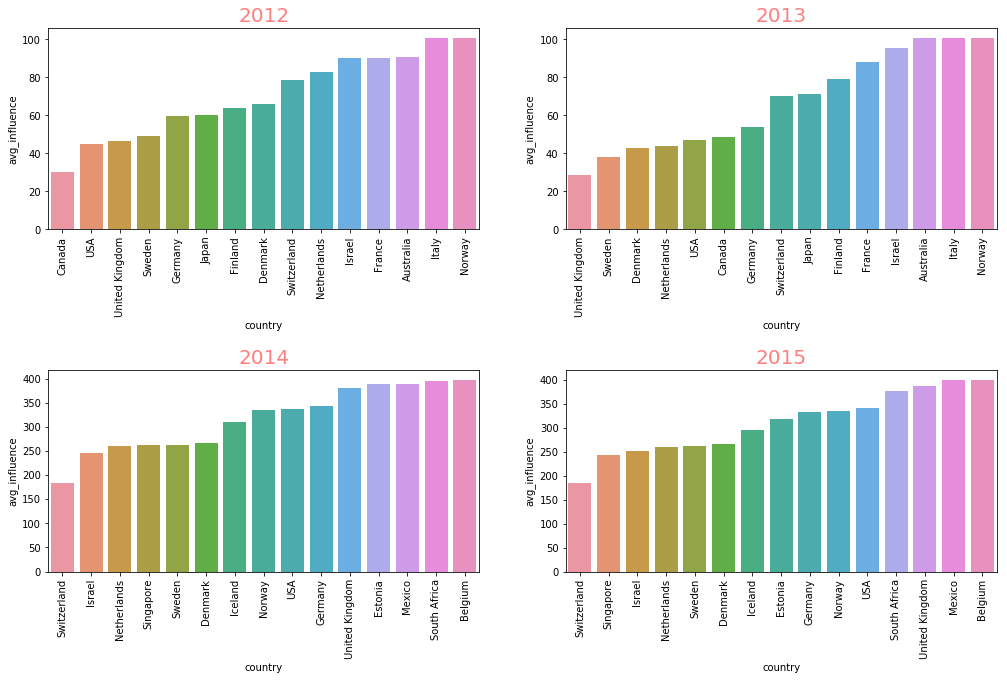

In [18]:
# Country wise average influence per institute
ctry_influence_avg = cwur_data.groupby(['year','country'])['influence'].mean()
ctry_influence_avg = pd.DataFrame(ctry_influence_avg)
ctry_influence_avg = ctry_influence_avg.reset_index()
ctry_influence_avg = ctry_influence_avg.sort_values(['year','influence'])
ctry_influence_avg = ctry_influence_avg.rename(columns = {'influence':'avg_influence'})

fig = plt.figure(figsize=(17,10))
ax = []
ax.append(fig.add_subplot(221))
ax.append(fig.add_subplot(222))
ax.append(fig.add_subplot(223))
ax.append(fig.add_subplot(224))
plt.subplots_adjust(hspace=0.7)

years = cwur_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_influence',data=ctry_influence_avg[ctry_influence_avg['year'] == y].head(15), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in overall score

Overall score is a combination of all the features used in ranking i.e. it includes quality of education, quality of faculty, alumni employment, citations, publications and influence. The higher the overall score the better the world ranking of that country.

Countries like Singapore, Netherlands, Russia, Israel and Switzerland have instititions that have high overall score. These have only few institutions and they are ranking high due to which they are rated highly. USA, United Kingdom, Canada and Japan are other countries that have many instututions and have high overall score.

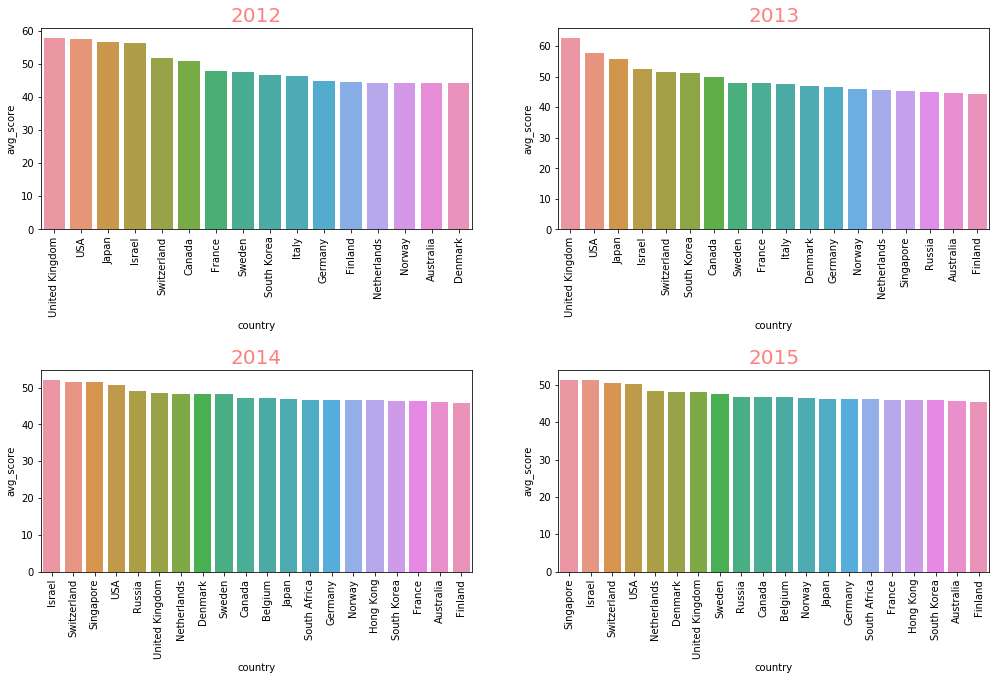

In [19]:
# Country wise average score per institute
ctry_score_avg = cwur_data.groupby(['year','country'])['score'].mean()
ctry_score_avg = pd.DataFrame(ctry_score_avg)
ctry_score_avg = ctry_score_avg.reset_index()
ctry_score_avg = ctry_score_avg.sort_values(['year','score'],ascending=False)
ctry_score_avg = ctry_score_avg.rename(columns = {'score':'avg_score'})

fig = plt.figure(figsize=(17,10))
ax = []
ax.append(fig.add_subplot(221))
ax.append(fig.add_subplot(222))
ax.append(fig.add_subplot(223))
ax.append(fig.add_subplot(224))
plt.subplots_adjust(hspace=0.7)

years = cwur_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_score',data=ctry_score_avg[ctry_score_avg['year'] == y].head(20), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in patents

Most of the top institutions in patents are from the USA. Other countries with top ranked institutions in patents are Japan, China and South Korea.

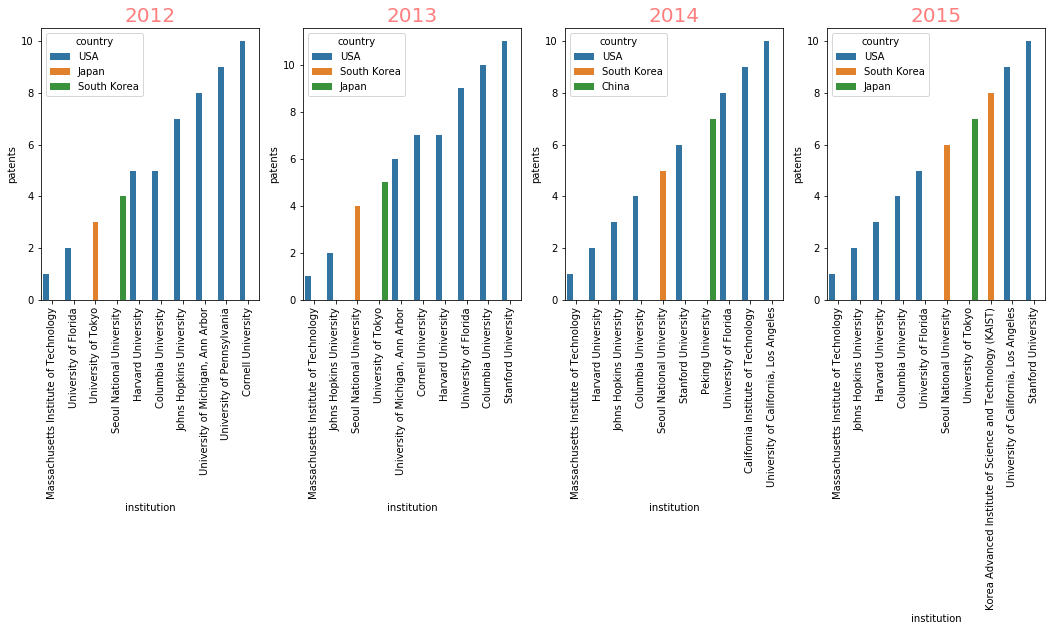

In [20]:
fig = plt.figure(figsize=(18,5))
ax = []
ax.append(fig.add_subplot(141))
ax.append(fig.add_subplot(142))
ax.append(fig.add_subplot(143))
ax.append(fig.add_subplot(144))
#plt.subplots_adjust(hspace=1.0)

i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='institution',y='patents',data=cwur_data[cwur_data['year']==y].sort_values(['patents'])[['institution','country','patents']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in quality of education

Most of the top institutions in quality of education are from the USA. Other countries with top ranked institutions in education quality are United Kingdom and France.

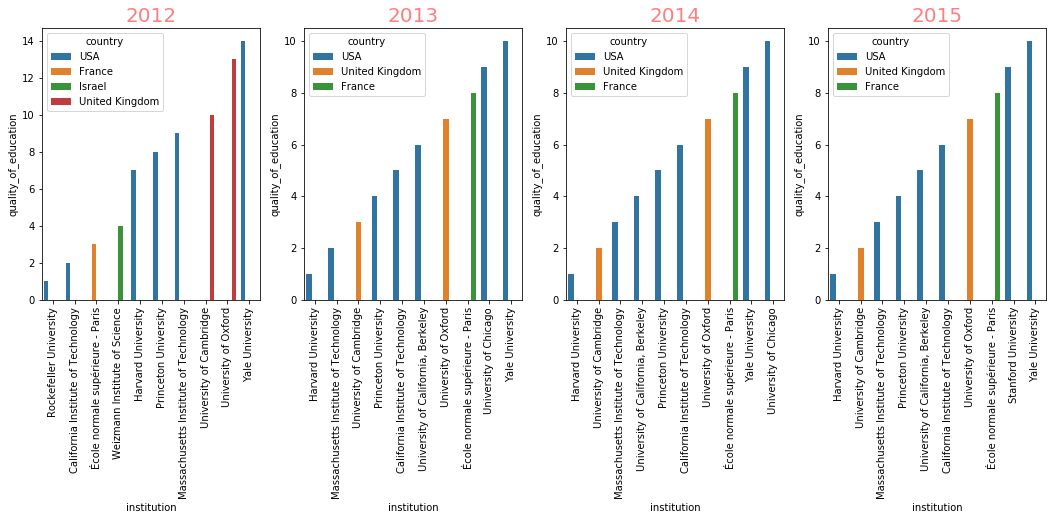

In [21]:
fig = plt.figure(figsize=(18,5))
ax = []
ax.append(fig.add_subplot(141))
ax.append(fig.add_subplot(142))
ax.append(fig.add_subplot(143))
ax.append(fig.add_subplot(144))

i = 0
for y in years:
    g = sns.barplot(x='institution',y='quality_of_education',
                    data=cwur_data[cwur_data['year']==y].sort_values(['quality_of_education'])[['institution','country','quality_of_education']].
                    head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in alumni employment

Most of the top institutions in alumni employment are from the USA. Other countries with top ranked institutions in patents are France and Japan

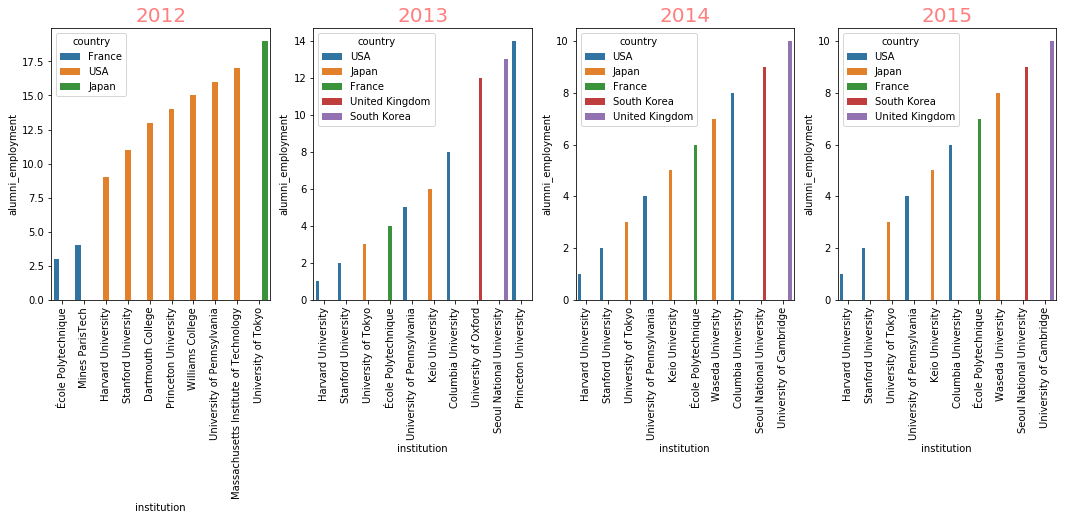

In [22]:
fig = plt.figure(figsize=(18,5))
ax = []
ax.append(fig.add_subplot(141))
ax.append(fig.add_subplot(142))
ax.append(fig.add_subplot(143))
ax.append(fig.add_subplot(144))

i = 0
for y in years:
    g = sns.barplot(x='institution',y='alumni_employment',
                    data=cwur_data[cwur_data['year']==y].sort_values(['alumni_employment'])[['institution','country','alumni_employment']].
                    head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in quality of faculty

Most of the top institutions in quality of faculty are from the USA. France also has few top ranked institutions.

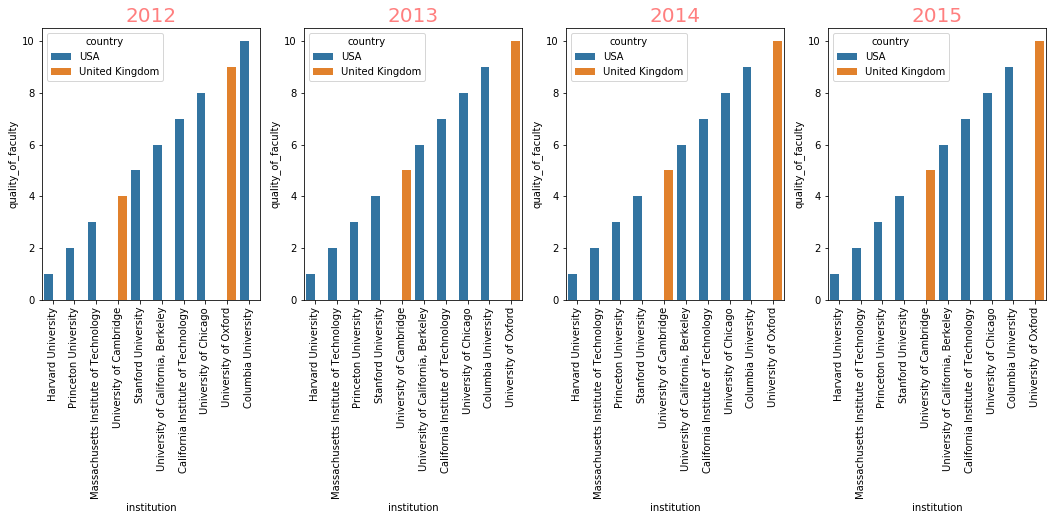

In [23]:
fig = plt.figure(figsize=(18,5))
ax = []
ax.append(fig.add_subplot(141))
ax.append(fig.add_subplot(142))
ax.append(fig.add_subplot(143))
ax.append(fig.add_subplot(144))

i = 0
for y in years:
    g = sns.barplot(x='institution',y='quality_of_faculty',
                    data=cwur_data[cwur_data['year']==y].sort_values(['quality_of_faculty'])[['institution','country','quality_of_faculty']].
                    head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in publications

Most of the top institutions in publications are from the USA. Other countries with top ranked institutions in patents are Canada and United Kingdom.

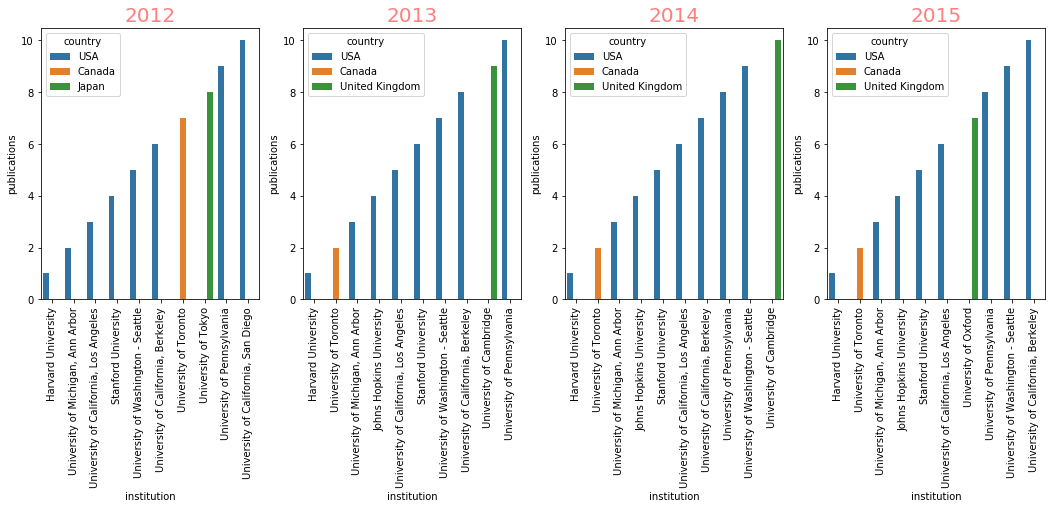

In [24]:
fig = plt.figure(figsize=(18,5))
ax = []
ax.append(fig.add_subplot(141))
ax.append(fig.add_subplot(142))
ax.append(fig.add_subplot(143))
ax.append(fig.add_subplot(144))

i = 0
for y in years:
    g = sns.barplot(x='institution',y='publications',
                    data=cwur_data[cwur_data['year']==y].
                    sort_values(['publications'])[['institution','country','publications']].
                    head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in citations

Most of the top institutions in citations are from the USA. 

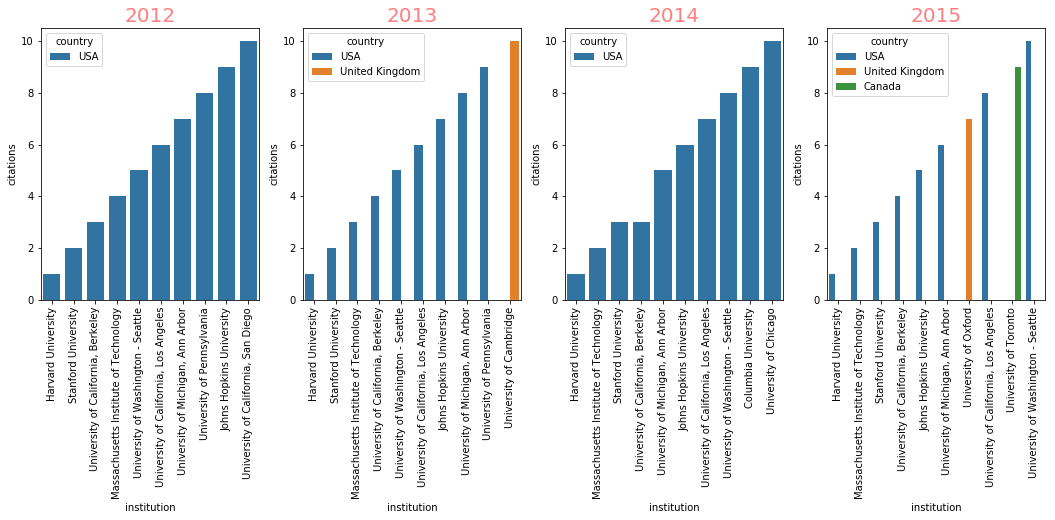

In [25]:
fig = plt.figure(figsize=(18,5))
ax = []
ax.append(fig.add_subplot(141))
ax.append(fig.add_subplot(142))
ax.append(fig.add_subplot(143))
ax.append(fig.add_subplot(144))

i = 0
for y in years:
    g = sns.barplot(x='institution',y='citations',
                    data=cwur_data[cwur_data['year']==y].
                    sort_values(['citations'])[['institution','country','citations']].
                    head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in infuence

Most of the top institutions in influence are from the USA. United Kingdom also has few top ranked institutions.

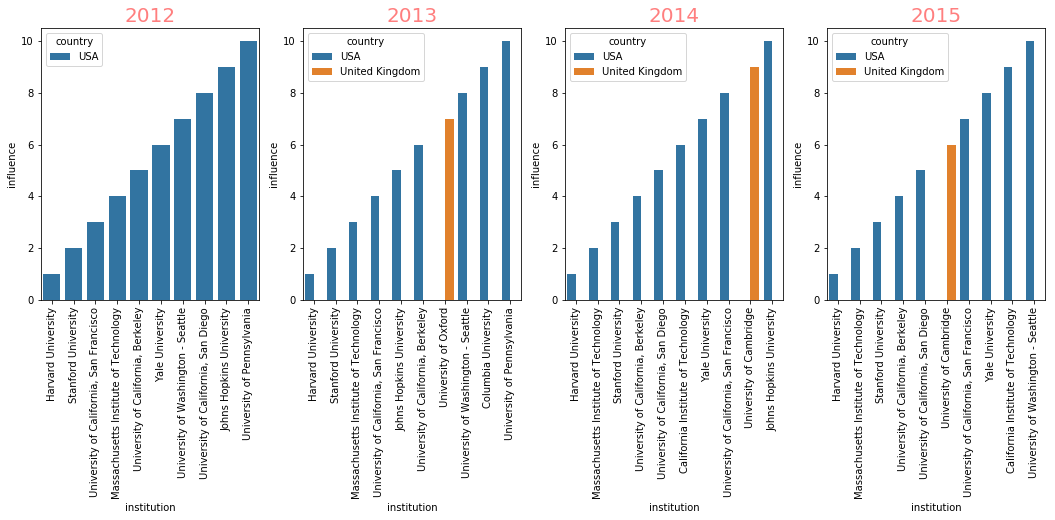

In [26]:
fig = plt.figure(figsize=(18,5))
ax = []
ax.append(fig.add_subplot(141))
ax.append(fig.add_subplot(142))
ax.append(fig.add_subplot(143))
ax.append(fig.add_subplot(144))

i = 0
for y in years:
    g = sns.barplot(x='institution',y='influence',
                    data=cwur_data[cwur_data['year']==y].
                    sort_values(['influence'])[['institution','country','influence']].
                    head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

# Multivariate Analysis

In [27]:
# Create dataset subset for each year to find correletaion among the numeric variables. National rank column is ignored
cwur_data_2012 = cwur_data[cwur_data['year']==2012][['world_rank','quality_of_education','alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score']]
cwur_data_2013 = cwur_data[cwur_data['year']==2013][['world_rank','quality_of_education','alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score']]
cwur_data_2014 = cwur_data[cwur_data['year']==2014][['world_rank','quality_of_education','alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score']]
cwur_data_2015 = cwur_data[cwur_data['year']==2015][['world_rank','quality_of_education','alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score']]

## Correlogram plot to see relation between the variables

All the years show almost similar correlations.
We see that score is strongly negatively related to most of the variables as better (lower value) the ranks in different categories the higher the score is. Quality of faculty, quality of education and world rank are the most determinant factors for score.
Quality of faculty and influence are string determinant for world rank.

We also see that publications, citations and influence are strongly positively correlated.

Alumni employment is weakly correlated to most of the variables especially quality of faculty, citations and influence.
Similarly quality of education is weakly correlated to citations, publications and patents.

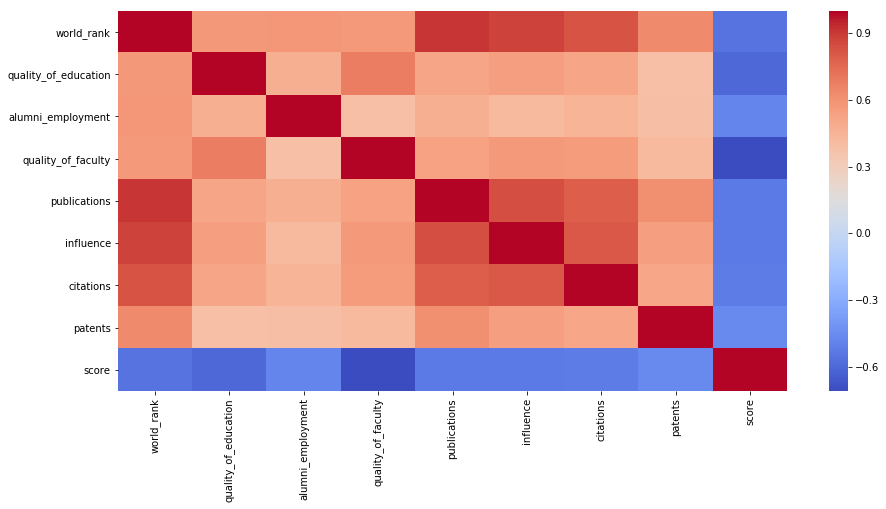

In [28]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(cwur_data_2015.corr(),cmap='coolwarm')

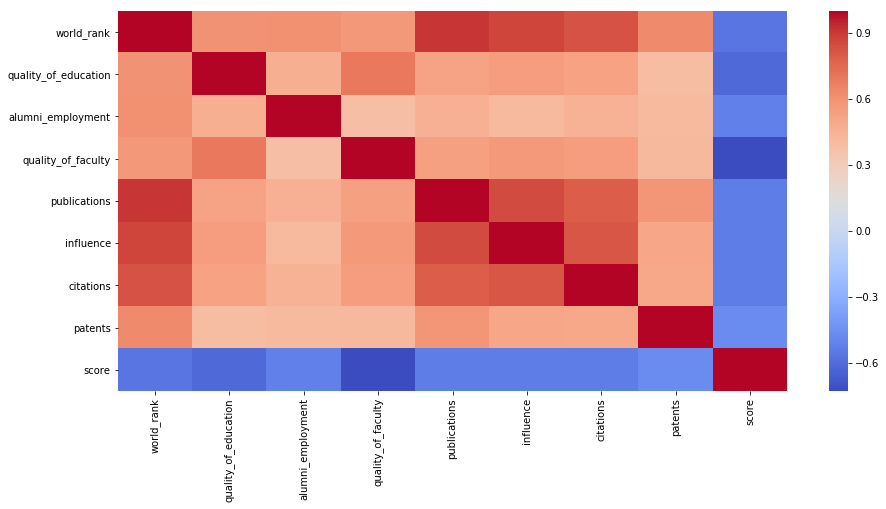

In [29]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(cwur_data_2014.corr(),cmap='coolwarm')

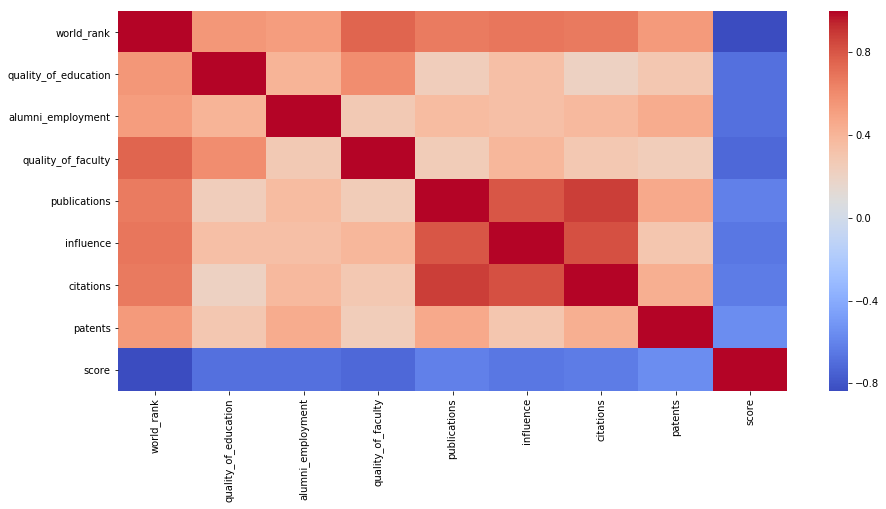

In [30]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(cwur_data_2013.corr(),cmap='coolwarm')

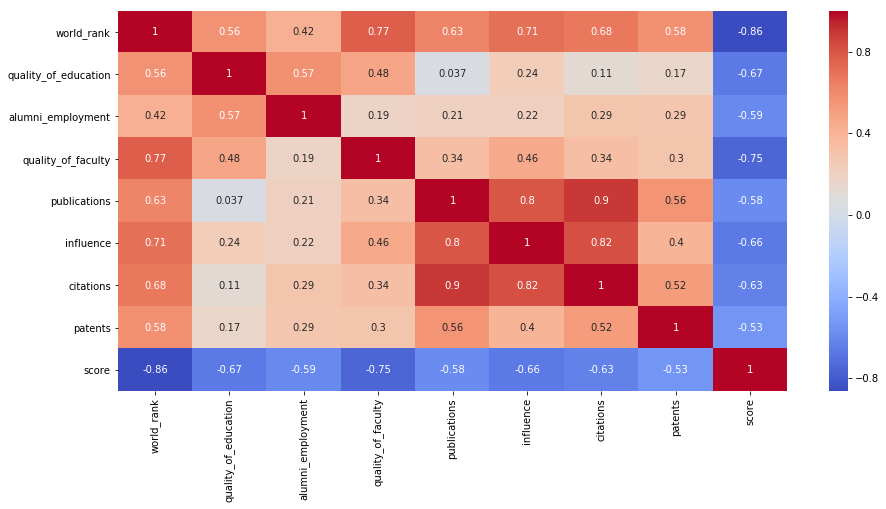

In [31]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(cwur_data_2012.corr(),cmap='coolwarm',annot=True)


The cluster map shows that quality of education and quality of faculty are in the same group. Citations, publications and influence are close together. Score is away from all other variables

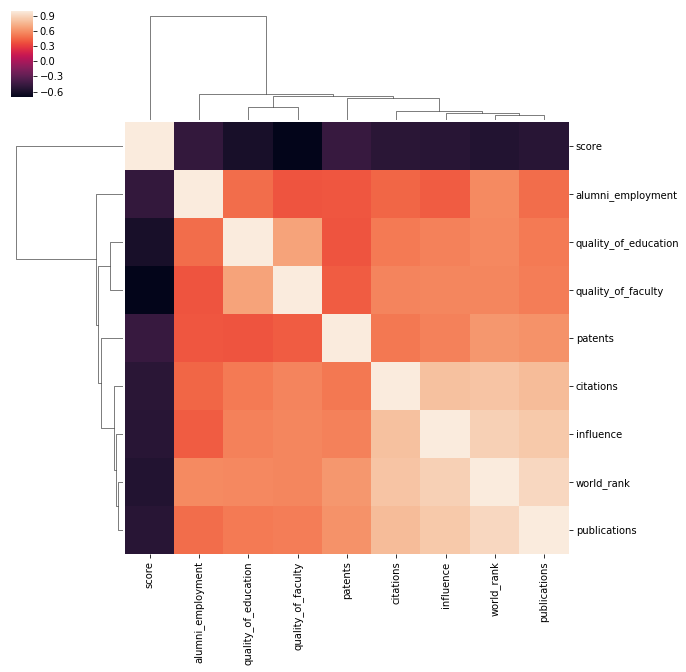

In [32]:
sns.clustermap(cwur_data_2015.corr())

## Heatmap showing countries and instutions ranking

In 2012 and 2013 only top 100 institutions were ranked. USA has significant number of top rated institutions in these two years.
From 2014 top 1000 institutions were ranked. Even in 2014 and 2015 USA had most number of institutions ranked in top 1000. it is floowed by China, Japan, United Kingdom, Germany and France.
This graph shows similar information as shown by graph in "Countries having top universities" section but it has a different view.


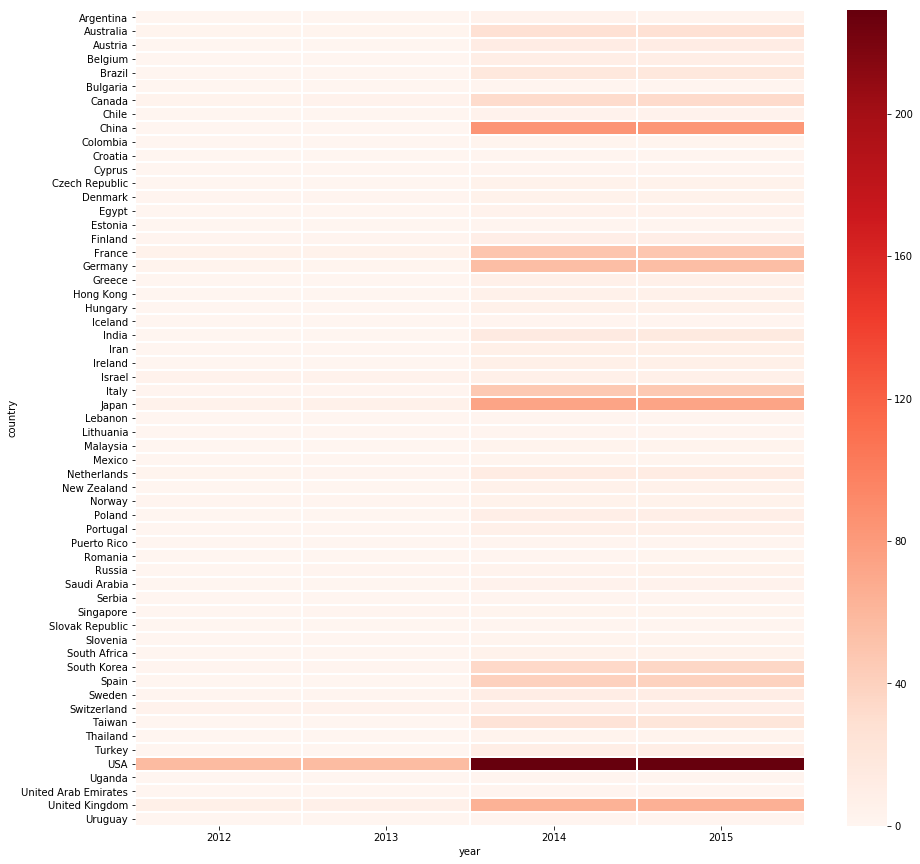

In [33]:
ctry_inst = cwur_data.groupby(['year','country'])['institution'].count()
ctry_inst = pd.DataFrame(ctry_inst)
ctry_inst = ctry_inst.reset_index()
pv_ctry_inst = ctry_inst.pivot_table(values='institution',index='country',columns='year')
pv_ctry_inst.fillna(0, inplace=True)
fig = plt.figure(figsize=(15,15))
sns.heatmap(pv_ctry_inst, cmap='Reds',linecolor='white',linewidths=1)

## Wordcloud

(-0.5, 399.5, 199.5, -0.5)

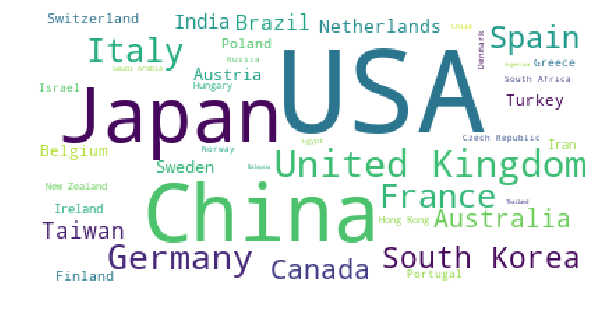

In [83]:
wc = WordCloud(background_color="white").generate(" ".join([i for i in cwur_data[cwur_data['year'] == 2015]['country']]))
plt.figure( figsize=(10,12))
plt.imshow(wc)
plt.axis("off")

## World Chloropleth Map for top ranked universities 

In [112]:
init_notebook_mode(connected=True) 

In [138]:
plt.figure( figsize=(20,12))

In [139]:
ctry_inst_2015 = ctry_inst[ctry_inst['year']==2015]

In [140]:
data = dict(type='choropleth',
            locationmode = 'country names',
            colorscale = 'Portland',
            autocolorscale = False,
            reversescale = True,
            locations = ctry_inst_2015['country'],
            z = ctry_inst_2015['institution'],
            text = ctry_inst_2015['country'],
            marker = dict(line = dict(color = 'rgb(102,102,102)',width = 2)),
            colorbar = {'title':"Institutions count"}
            ) 

In [155]:
layout = dict(
    title = '2015 World Class Universities',
    geo = dict(
        scope='world',
        projection=dict( type='robinson' ),
        showlakes = True,
        lakecolor = 'rgb(74, 129, 179)'
    )
)

In [156]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

# Times Ranking Analysis

In [34]:
times_data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [35]:
## Summary Statistics
times_data.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [36]:
# Get dataset dimensions and variable data types
times_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [37]:
# Size of dataset
times_data.shape

(2603, 14)

In [38]:
times_data.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

## Some Cleaning

In [39]:
# International stidents is in percentage. '%' is removed and then the variable is converted into numeric
times_data['international_students'] = times_data['international_students'].map(lambda x: str(x)[:-1])
times_data['international_students'] = times_data['international_students'].fillna(0)
times_data['international_students'].replace(regex=True,inplace=True,to_replace=r'na',value=r'0')
times_data['international_students'] = pd.to_numeric(times_data['international_students'])

In [40]:
times_data['international'].replace(regex=True,inplace=True,to_replace=r'-',value=r'0')
times_data['international'] = pd.to_numeric(times_data['international'])

In [41]:
times_data['income'].replace(regex=True,inplace=True,to_replace=r'-',value=r'0')
times_data['income'] = pd.to_numeric(times_data['income'])

In [42]:
times_data['total_score'].replace(regex=True,inplace=True,to_replace=r'-',value=r'0')
times_data['total_score'] = pd.to_numeric(times_data['total_score'])

In [43]:
times_data['num_students'].replace(regex=True,inplace=True,to_replace=r',',value=r'')
times_data['num_students'] = pd.to_numeric(times_data['num_students'])
times_data['num_students']= times_data['num_students'].fillna(0).astype(int)

In [44]:
temp2 = times_data.world_rank.str.split('-', expand=True)
temp3 = times_data.join(temp2[0])
temp3.drop('world_rank',axis = 1,inplace=True)
times_data = temp3.rename(columns={0:'world_rank'})
times_data['world_rank'].replace(regex=True,inplace=True,to_replace=r'=',value=r'')
times_data['world_rank'] = pd.to_numeric(times_data['world_rank'])

In [45]:
temp2 = times_data.female_male_ratio.str.split(':', expand=True)
temp3 = times_data.join(temp2[0])
temp3 = temp3.join(temp2[1])
temp3.drop('female_male_ratio',axis = 1,inplace=True)
temp3[0].replace(regex=True,inplace=True,to_replace=r'-',value=r'')
temp3[0] = pd.to_numeric(temp3[0])
temp3[1] = pd.to_numeric(temp3[1])
temp3['female_male_ratio'] = temp3[0]/temp3[1]
temp3.drop(0,axis = 1,inplace=True)
temp3.drop(1,axis = 1,inplace=True)
times_data = temp3


## Year wise institutions ranked distribution

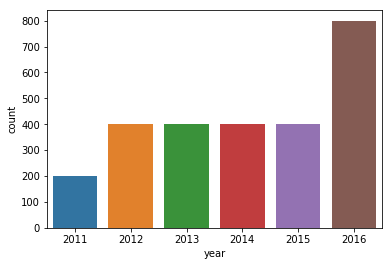

In [46]:
sns.countplot(x='year', data=times_data)

## Countries rated top in teaching

Singapore, USA, Brazil and Japan

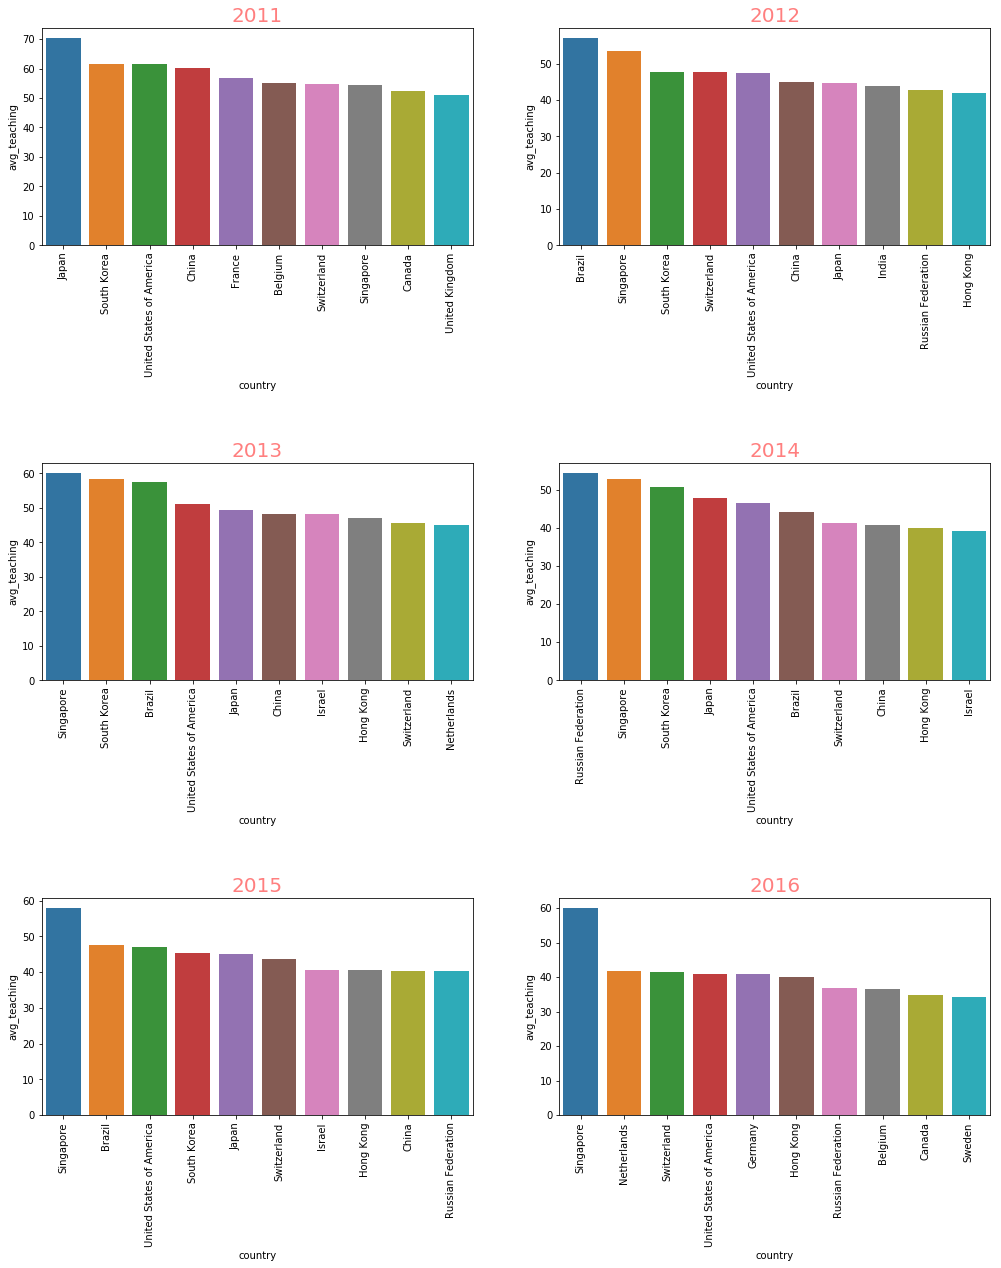

In [47]:
# Country wise average patents ranking per institute
ctry_teaching_avg = times_data.groupby(['year','country'])['teaching'].mean()
ctry_teaching_avg = pd.DataFrame(ctry_teaching_avg)
ctry_teaching_avg = ctry_teaching_avg.reset_index()
ctry_teaching_avg = ctry_teaching_avg.sort_values(['year','teaching'],ascending=False)
ctry_teaching_avg = ctry_teaching_avg.rename(columns = {'teaching':'avg_teaching'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_teaching',data=ctry_teaching_avg[ctry_teaching_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in international

Singapore, Switzerland, New Zealand and UK

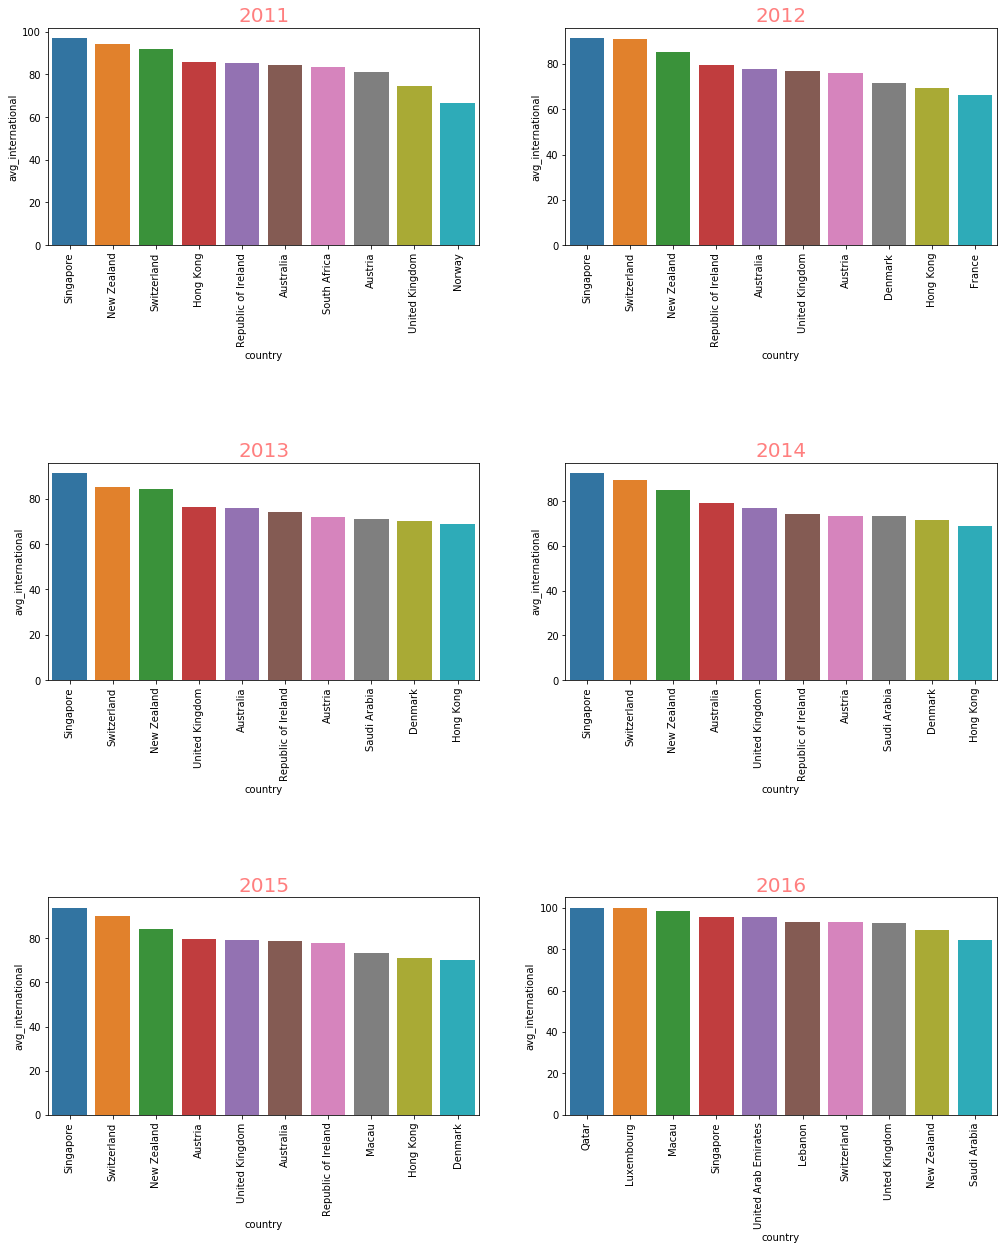

In [48]:
# Country wise average patents ranking per institute
ctry_international_avg = times_data.groupby(['year','country'])['international'].mean()
ctry_international_avg = pd.DataFrame(ctry_international_avg)
ctry_international_avg = ctry_international_avg.reset_index()
ctry_international_avg = ctry_international_avg.sort_values(['year','international'],ascending=False)
ctry_international_avg = ctry_international_avg.rename(columns = {'international':'avg_international'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_international',data=ctry_international_avg[ctry_international_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in research

Singapore, Netherlands, USA, Japan, Canada

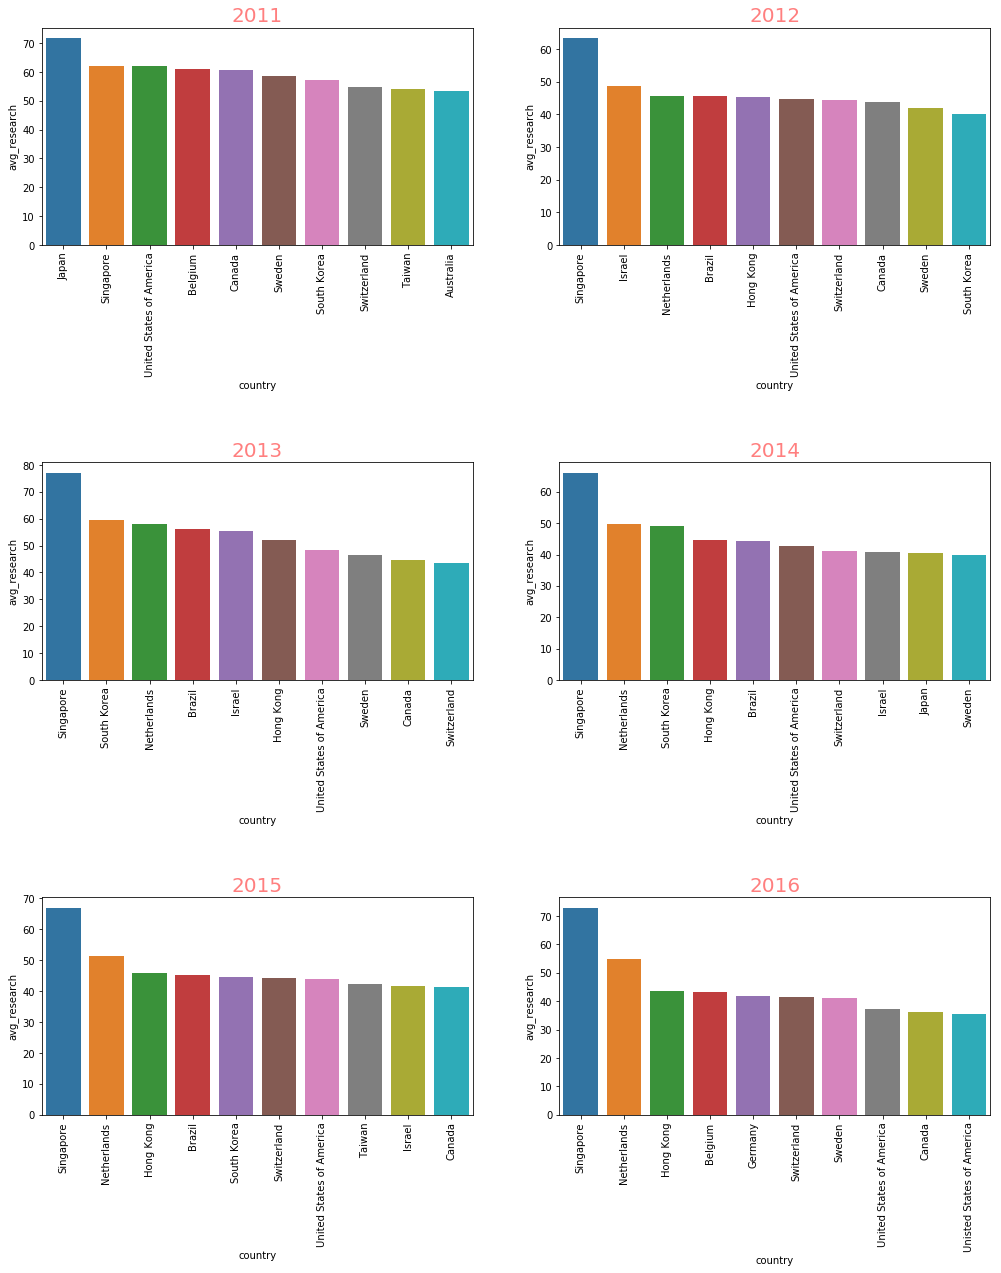

In [49]:
# Country wise average patents ranking per institute
ctry_research_avg = times_data.groupby(['year','country'])['research'].mean()
ctry_research_avg = pd.DataFrame(ctry_research_avg)
ctry_research_avg = ctry_research_avg.reset_index()
ctry_research_avg = ctry_research_avg.sort_values(['year','research'],ascending=False)
ctry_research_avg = ctry_research_avg.rename(columns = {'research':'avg_research'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_research',data=ctry_research_avg[ctry_research_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in citations

USA, UK, Switzerland.

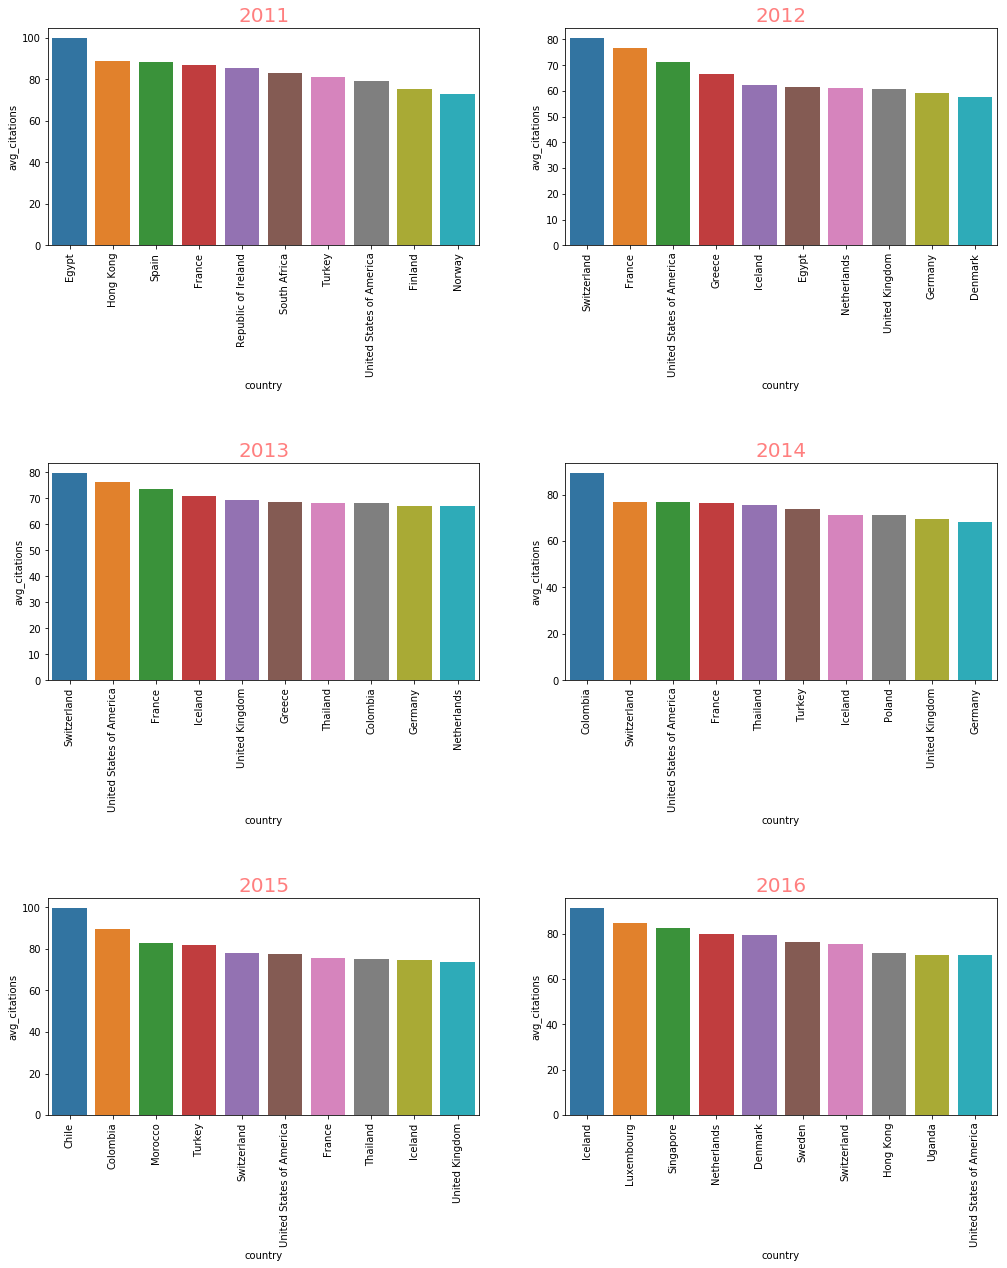

In [50]:
# Country wise average patents ranking per institute
ctry_citations_avg = times_data.groupby(['year','country'])['citations'].mean()
ctry_citations_avg = pd.DataFrame(ctry_citations_avg)
ctry_citations_avg = ctry_citations_avg.reset_index()
ctry_citations_avg = ctry_citations_avg.sort_values(['year','citations'],ascending=False)
ctry_citations_avg = ctry_citations_avg.rename(columns = {'citations':'avg_citations'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_citations',data=ctry_citations_avg[ctry_citations_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in income

South Africa, South Korea, Netherlands, China.

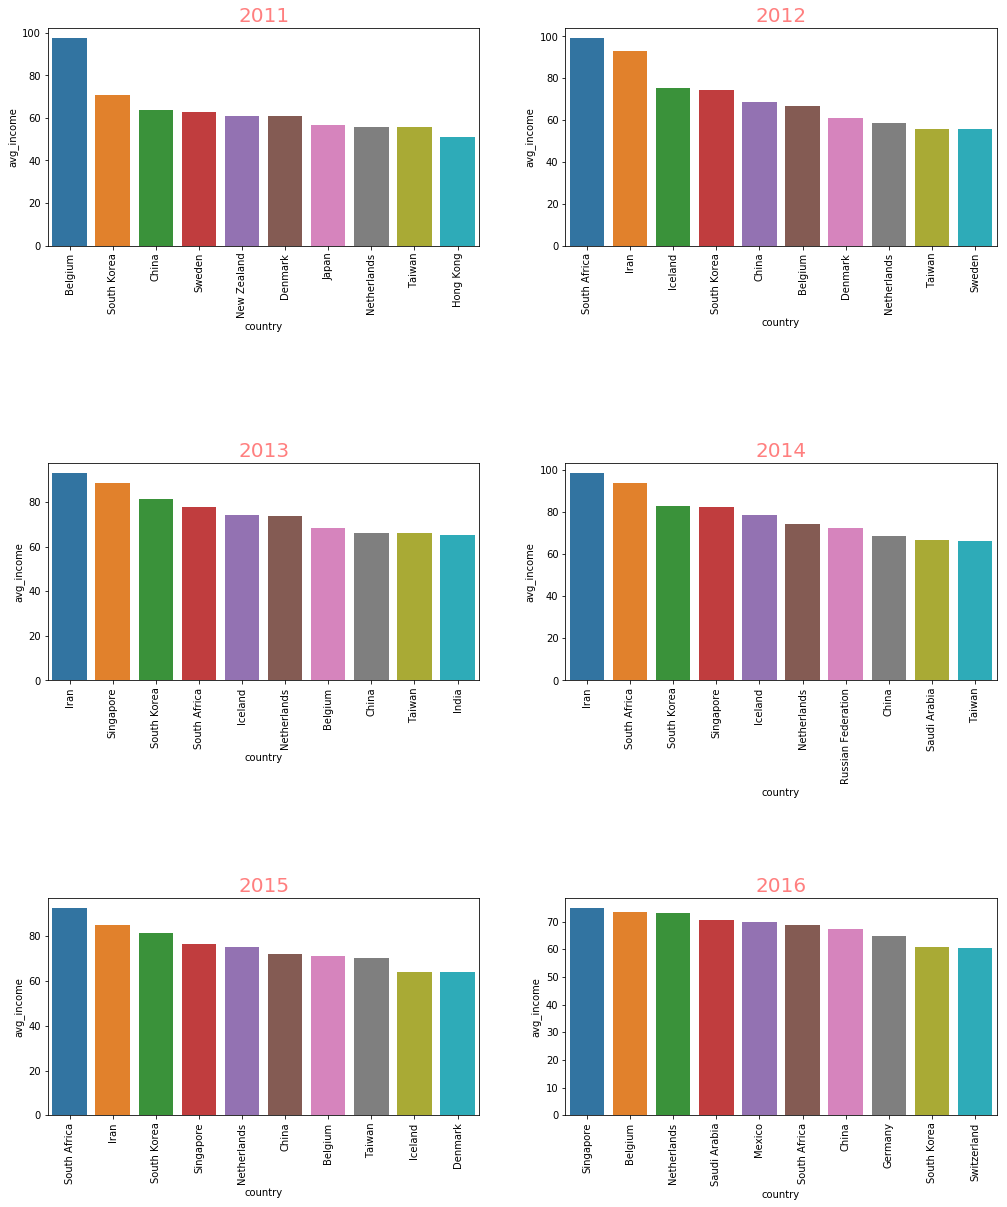

In [51]:
# Country wise average patents ranking per institute
ctry_income_avg = times_data.groupby(['year','country'])['income'].mean()
ctry_income_avg = pd.DataFrame(ctry_income_avg)
ctry_income_avg = ctry_income_avg.reset_index()
ctry_income_avg = ctry_income_avg.sort_values(['year','income'],ascending=False)
ctry_income_avg = ctry_income_avg.rename(columns = {'income':'avg_income'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_income',data=ctry_income_avg[ctry_income_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in total score

Singapore, Netherlands, Switzerland, USA< UK

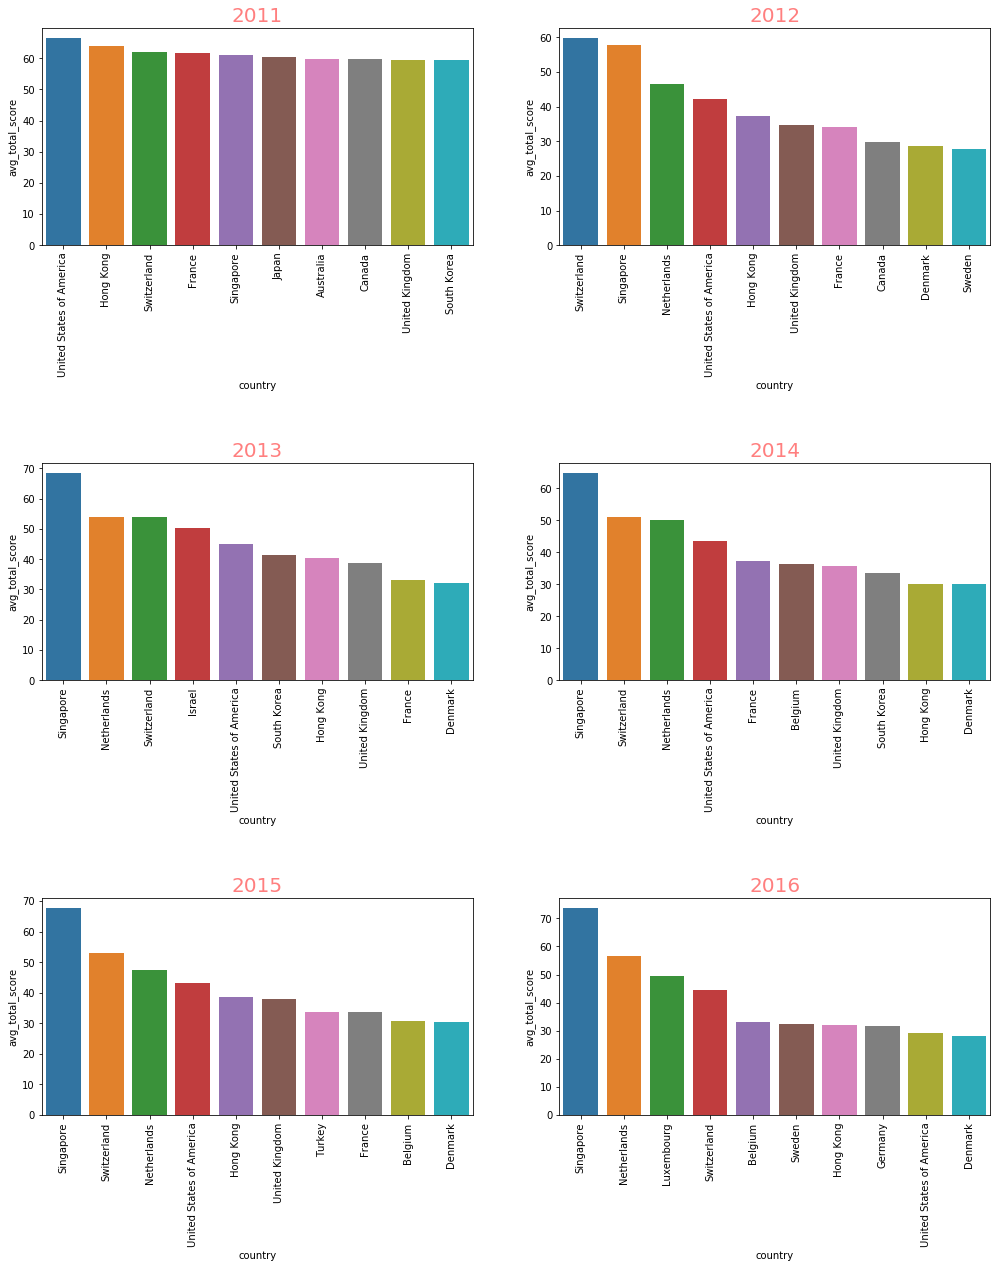

In [52]:
# Country wise average patents ranking per institute
ctry_total_score_avg = times_data.groupby(['year','country'])['total_score'].mean()
ctry_total_score_avg = pd.DataFrame(ctry_total_score_avg)
ctry_total_score_avg = ctry_total_score_avg.reset_index()
ctry_total_score_avg = ctry_total_score_avg.sort_values(['year','total_score'],ascending=False)
ctry_total_score_avg = ctry_total_score_avg.rename(columns = {'total_score':'avg_total_score'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_total_score',data=ctry_total_score_avg[ctry_total_score_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in number of students

Varies with year

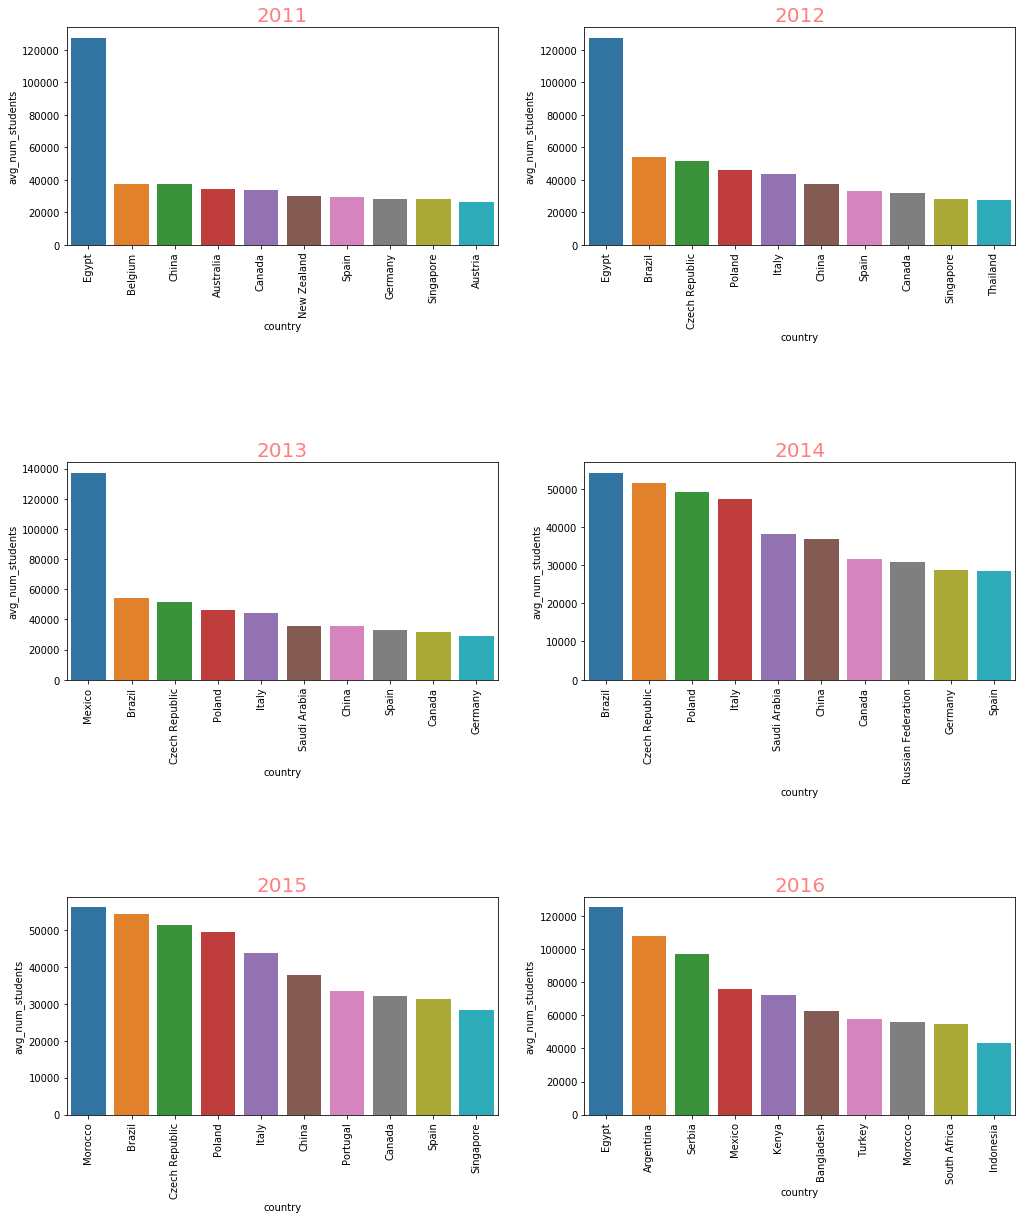

In [53]:
# Country wise average patents ranking per institute
ctry_num_students_avg = times_data.groupby(['year','country'])['num_students'].mean()
ctry_num_students_avg = pd.DataFrame(ctry_num_students_avg)
ctry_num_students_avg = ctry_num_students_avg.reset_index()
ctry_num_students_avg = ctry_num_students_avg.sort_values(['year','num_students'],ascending=False)
ctry_num_students_avg = ctry_num_students_avg.rename(columns = {'num_students':'avg_num_students'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_num_students',data=ctry_num_students_avg[ctry_num_students_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in student staff ratio

It varies. Japan is one among them.

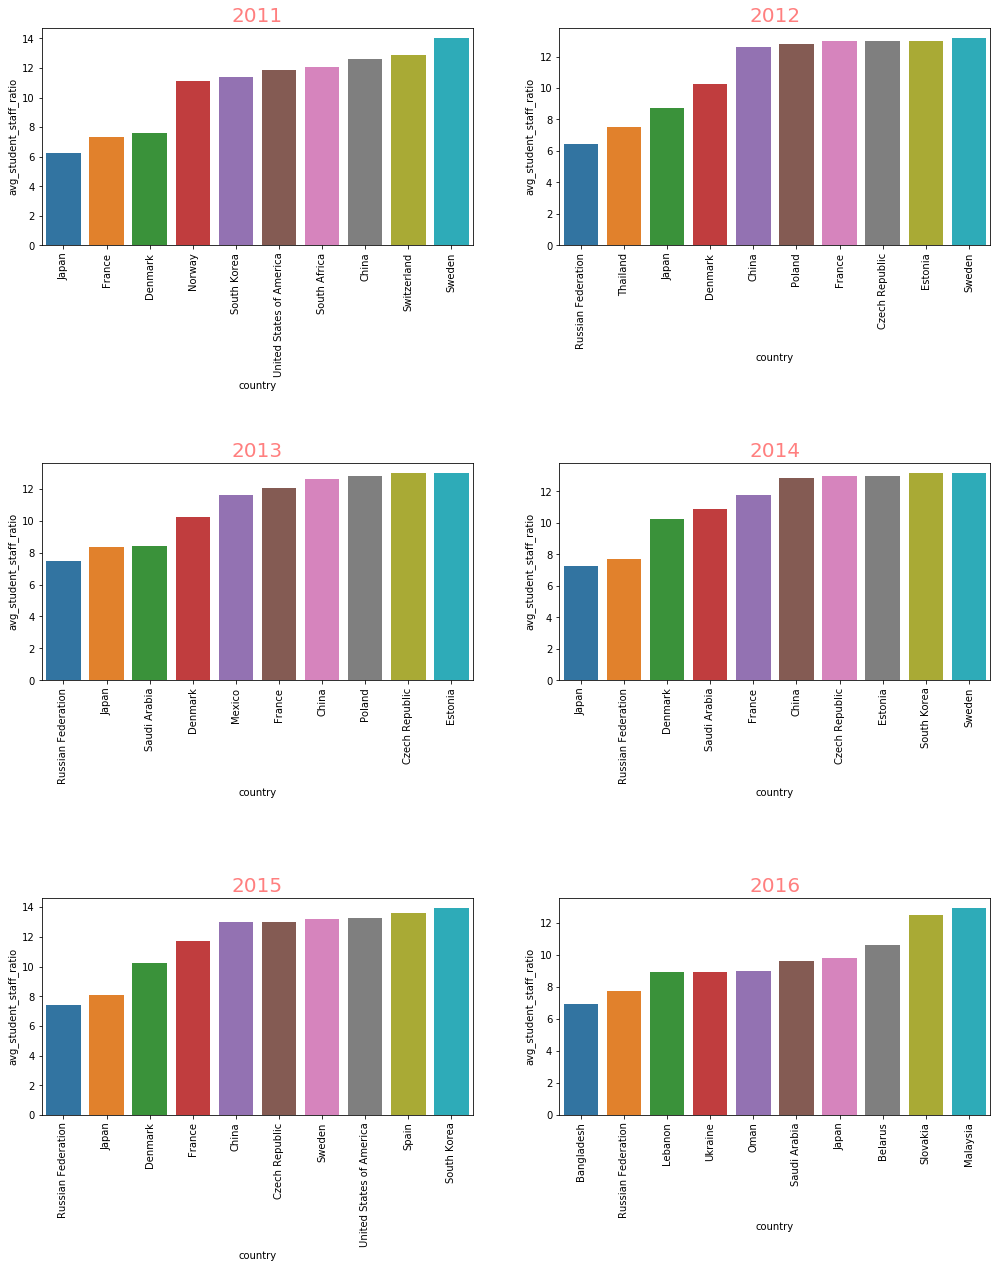

In [54]:
# Country wise average patents ranking per institute
ctry_ssr_avg = times_data.groupby(['year','country'])['student_staff_ratio'].mean()
ctry_ssr_avg = pd.DataFrame(ctry_ssr_avg)
ctry_ssr_avg = ctry_ssr_avg.reset_index()
ctry_ssr_avg = ctry_ssr_avg.sort_values(['year','student_staff_ratio'])
ctry_ssr_avg = ctry_ssr_avg.rename(columns = {'student_staff_ratio':'avg_student_staff_ratio'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_student_staff_ratio',data=ctry_ssr_avg[ctry_ssr_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in international students

Singapore, Switzerland, United Kingdom

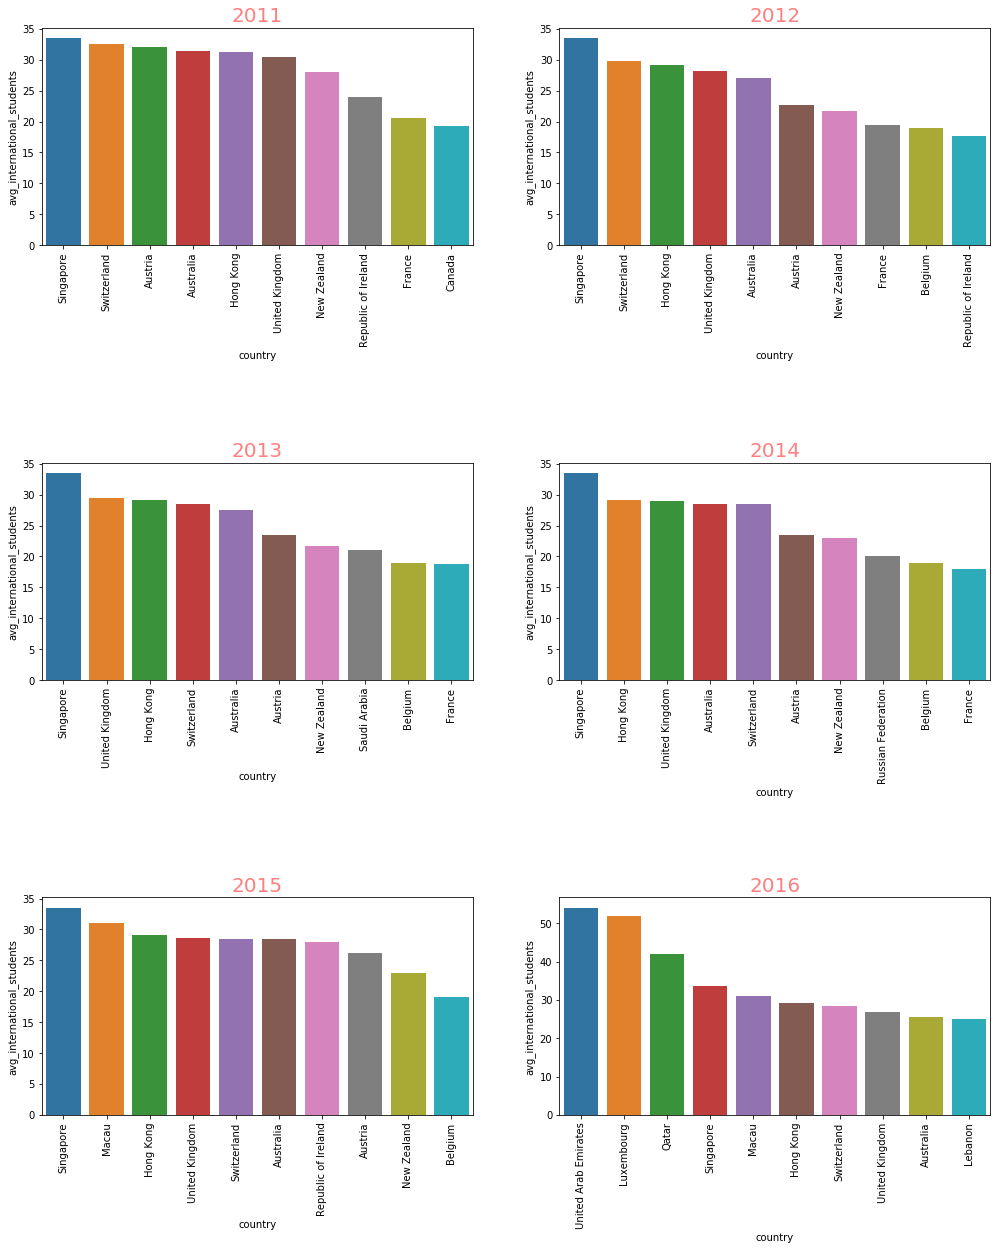

In [55]:
# Country wise average patents ranking per institute
ctry_is_avg = times_data.groupby(['year','country'])['international_students'].mean()
ctry_is_avg = pd.DataFrame(ctry_is_avg)
ctry_is_avg = ctry_is_avg.reset_index()
ctry_is_avg = ctry_is_avg.sort_values(['year','international_students'],ascending=False)
ctry_is_avg = ctry_is_avg.rename(columns = {'international_students':'avg_international_students'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_international_students',data=ctry_is_avg[ctry_is_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Countries rated top in world rank

USA, UK, Singapore, Switzerland

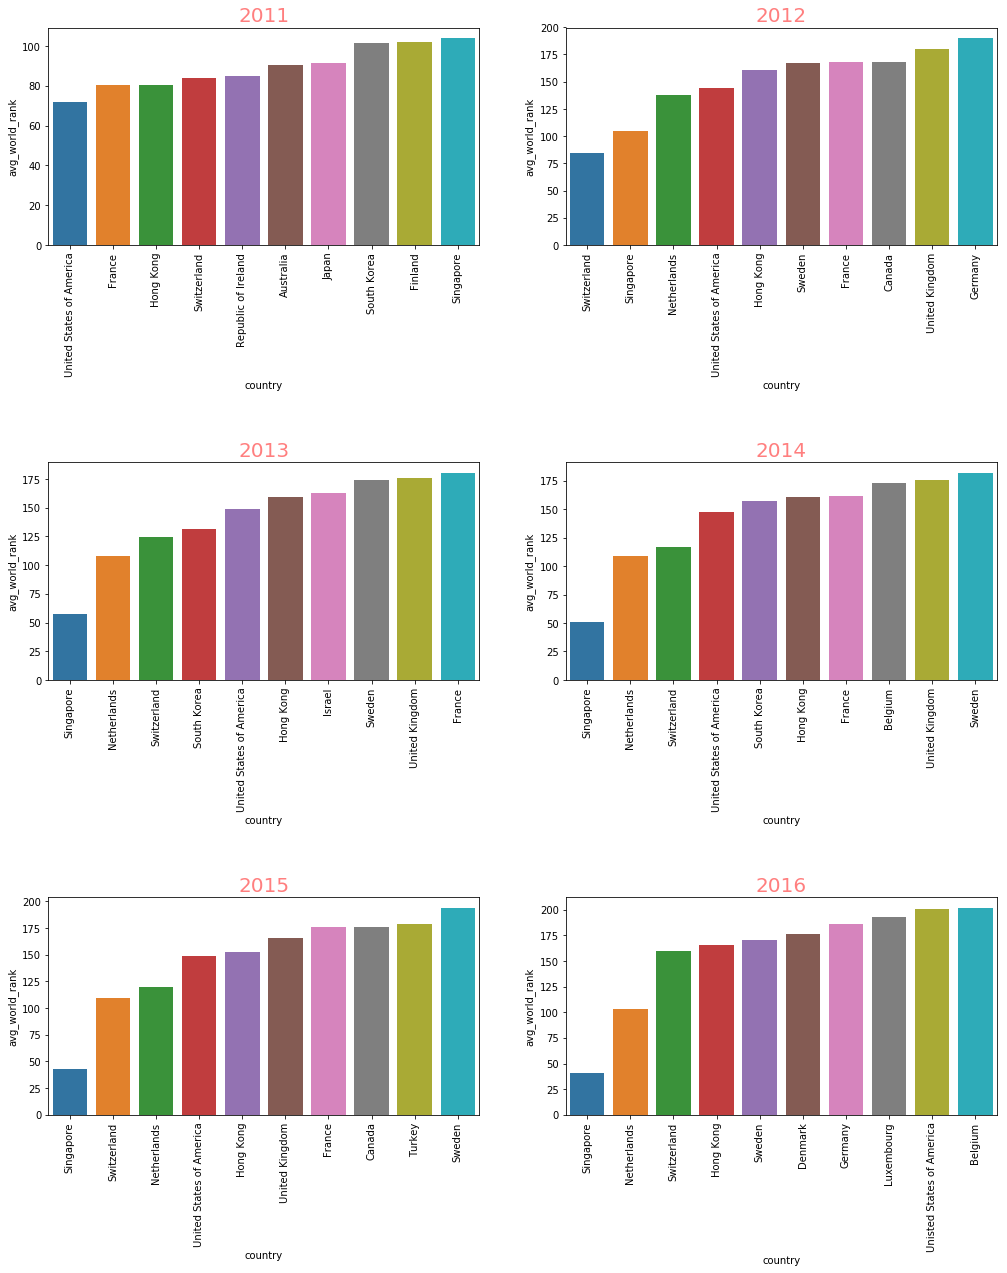

In [56]:
# Country wise average patents ranking per institute
ctry_world_rank_avg = times_data.groupby(['year','country'])['world_rank'].mean()
ctry_world_rank_avg = pd.DataFrame(ctry_world_rank_avg)
ctry_world_rank_avg = ctry_world_rank_avg.reset_index()
ctry_world_rank_avg = ctry_world_rank_avg.sort_values(['year','world_rank'])
ctry_world_rank_avg = ctry_world_rank_avg.rename(columns = {'world_rank':'avg_world_rank'})

fig = plt.figure(figsize=(17,20))
ax = []
ax.append(fig.add_subplot(321))
ax.append(fig.add_subplot(322))
ax.append(fig.add_subplot(323))
ax.append(fig.add_subplot(324))
ax.append(fig.add_subplot(325))
ax.append(fig.add_subplot(326))
plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=0.7)

years = times_data.year.unique()
i = 0
for y in years:
    g = sns.barplot(x='country',y='avg_world_rank',data=ctry_world_rank_avg[ctry_world_rank_avg['year'] == y].head(10), ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in teaching

Most of the top institutions in teaching are from the USA. United Kingdom also has few top ranked institutions.

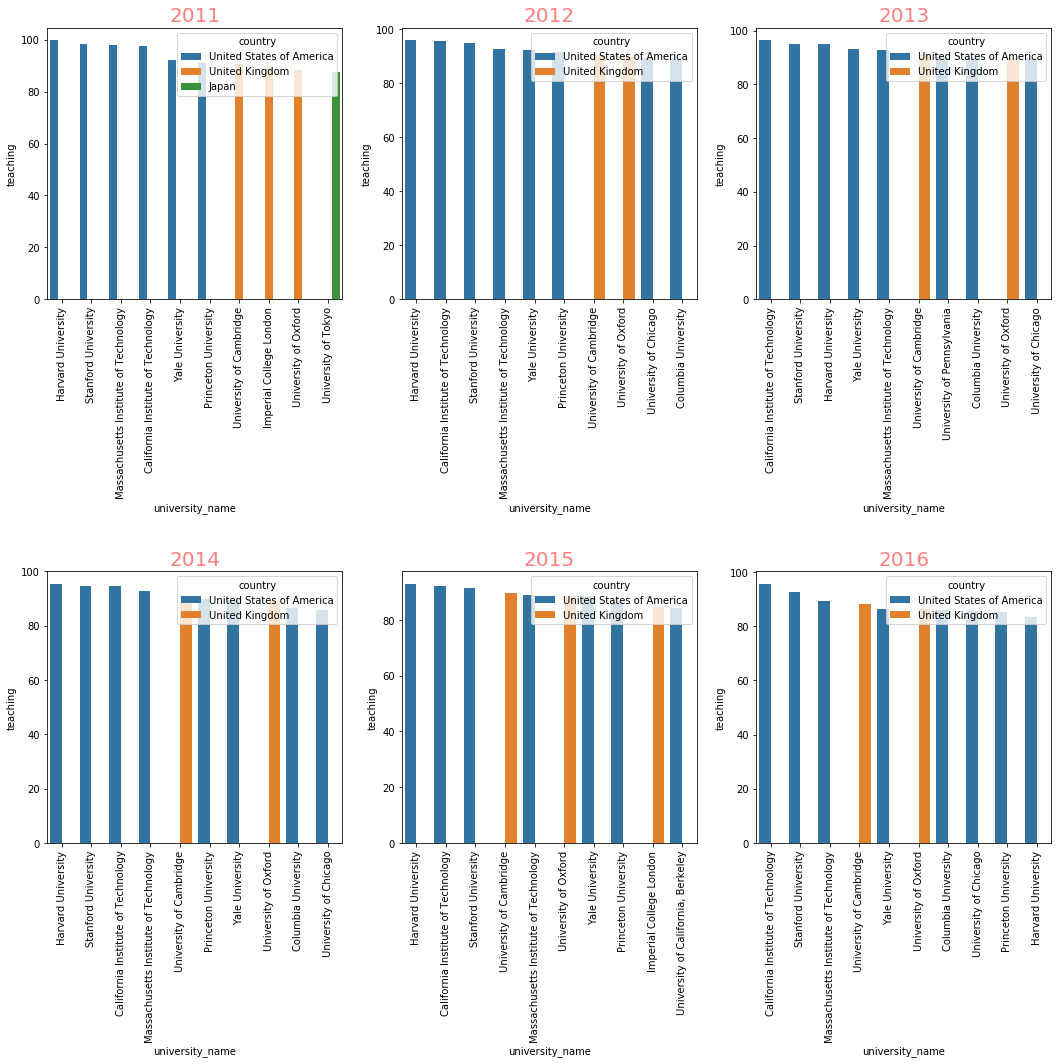

In [57]:
fig = plt.figure(figsize=(18,15))
ax = []
ax.append(fig.add_subplot(231))
ax.append(fig.add_subplot(232))
ax.append(fig.add_subplot(233))
ax.append(fig.add_subplot(234))
ax.append(fig.add_subplot(235))
ax.append(fig.add_subplot(236))
plt.subplots_adjust(hspace=1.0)

years = times_data.year.unique()
i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='university_name',y='teaching',data=times_data[times_data['year']==y].sort_values(['teaching'], ascending=False)[['university_name','country','teaching']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in international

Top institutions ain international are spread across Switzerlan, United Kingdom, Australia and few other countries.

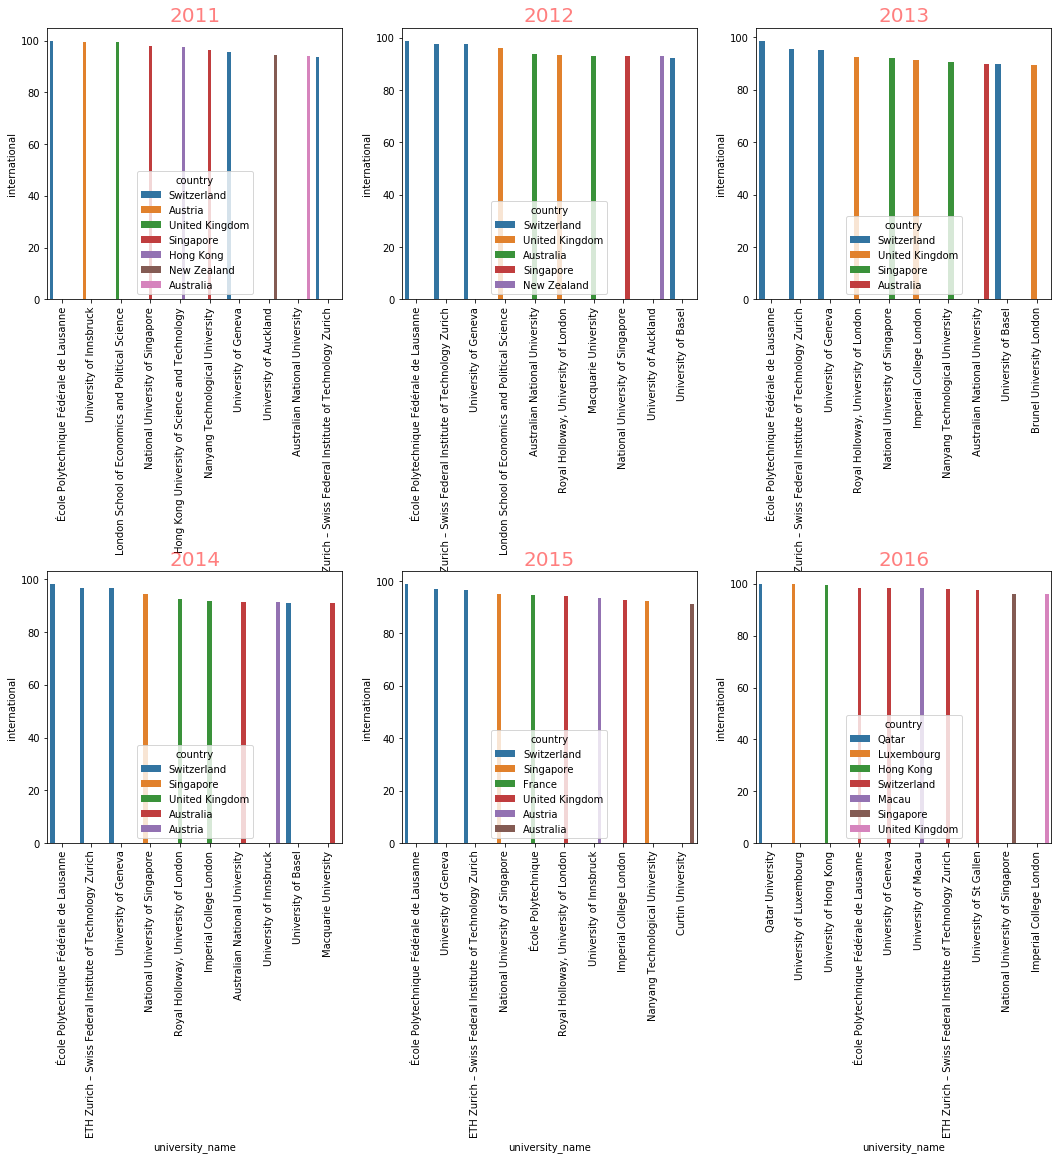

In [58]:
fig = plt.figure(figsize=(18,15))
ax = []
ax.append(fig.add_subplot(231))
ax.append(fig.add_subplot(232))
ax.append(fig.add_subplot(233))
ax.append(fig.add_subplot(234))
ax.append(fig.add_subplot(235))
ax.append(fig.add_subplot(236))
plt.subplots_adjust(hspace=1.0)

years = times_data.year.unique()
i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='university_name',y='international',data=times_data[times_data['year']==y].sort_values(['international'], ascending=False)[['university_name','country','international']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in research

USA and UK institutes top in research.

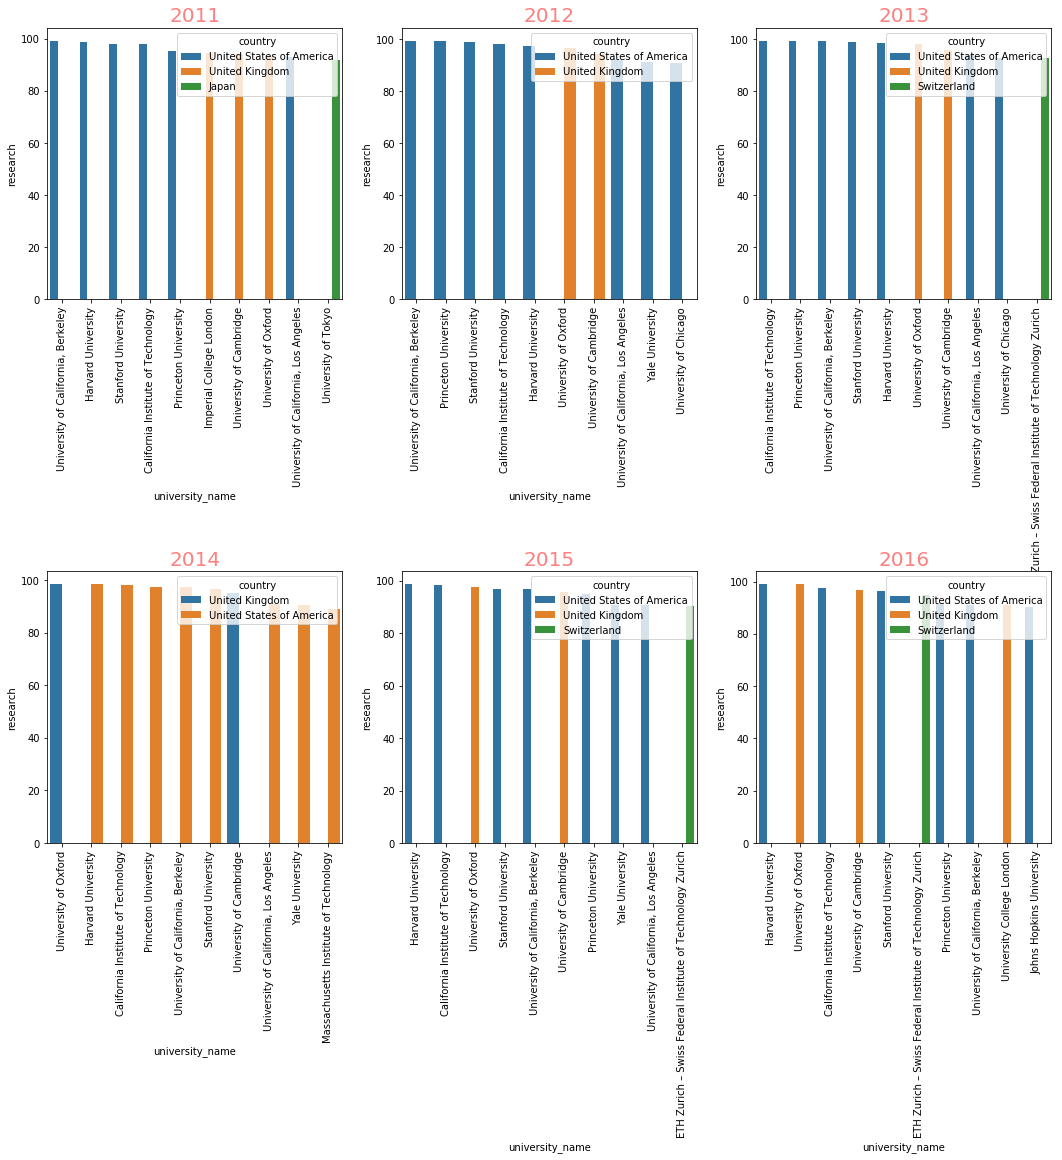

In [59]:
fig = plt.figure(figsize=(18,15))
ax = []
ax.append(fig.add_subplot(231))
ax.append(fig.add_subplot(232))
ax.append(fig.add_subplot(233))
ax.append(fig.add_subplot(234))
ax.append(fig.add_subplot(235))
ax.append(fig.add_subplot(236))
plt.subplots_adjust(hspace=1.0)

years = times_data.year.unique()
i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='university_name',y='research',data=times_data[times_data['year']==y].sort_values(['research'], ascending=False)[['university_name','country','research']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in citations

Most of the top institutions in citations are from the USA. 

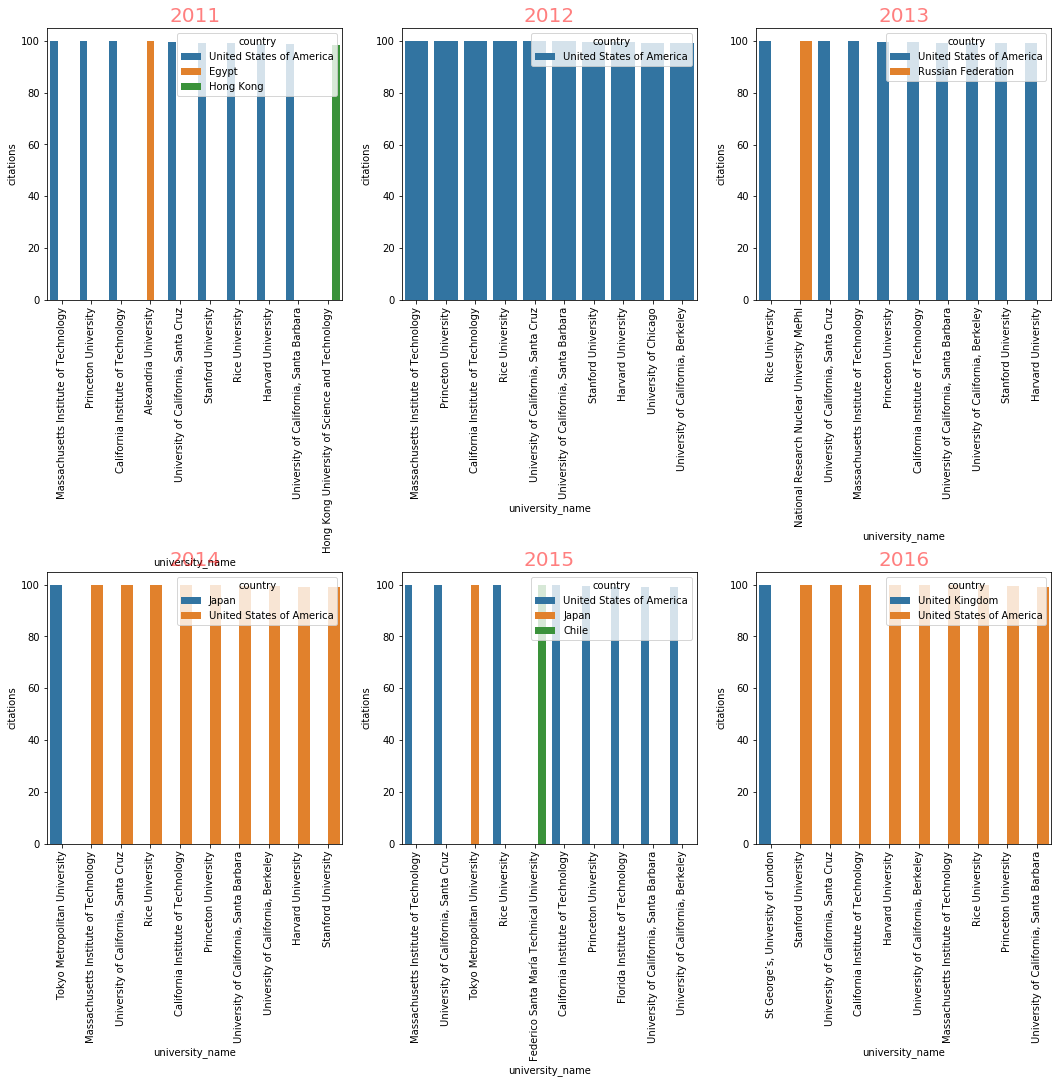

In [60]:
fig = plt.figure(figsize=(18,15))
ax = []
ax.append(fig.add_subplot(231))
ax.append(fig.add_subplot(232))
ax.append(fig.add_subplot(233))
ax.append(fig.add_subplot(234))
ax.append(fig.add_subplot(235))
ax.append(fig.add_subplot(236))
plt.subplots_adjust(hspace=1.0)

years = times_data.year.unique()
i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='university_name',y='citations',data=times_data[times_data['year']==y].sort_values(['citations'], ascending=False)[['university_name','country','citations']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in income

USA, Netherlands and South Korea have top 10 universities in income.

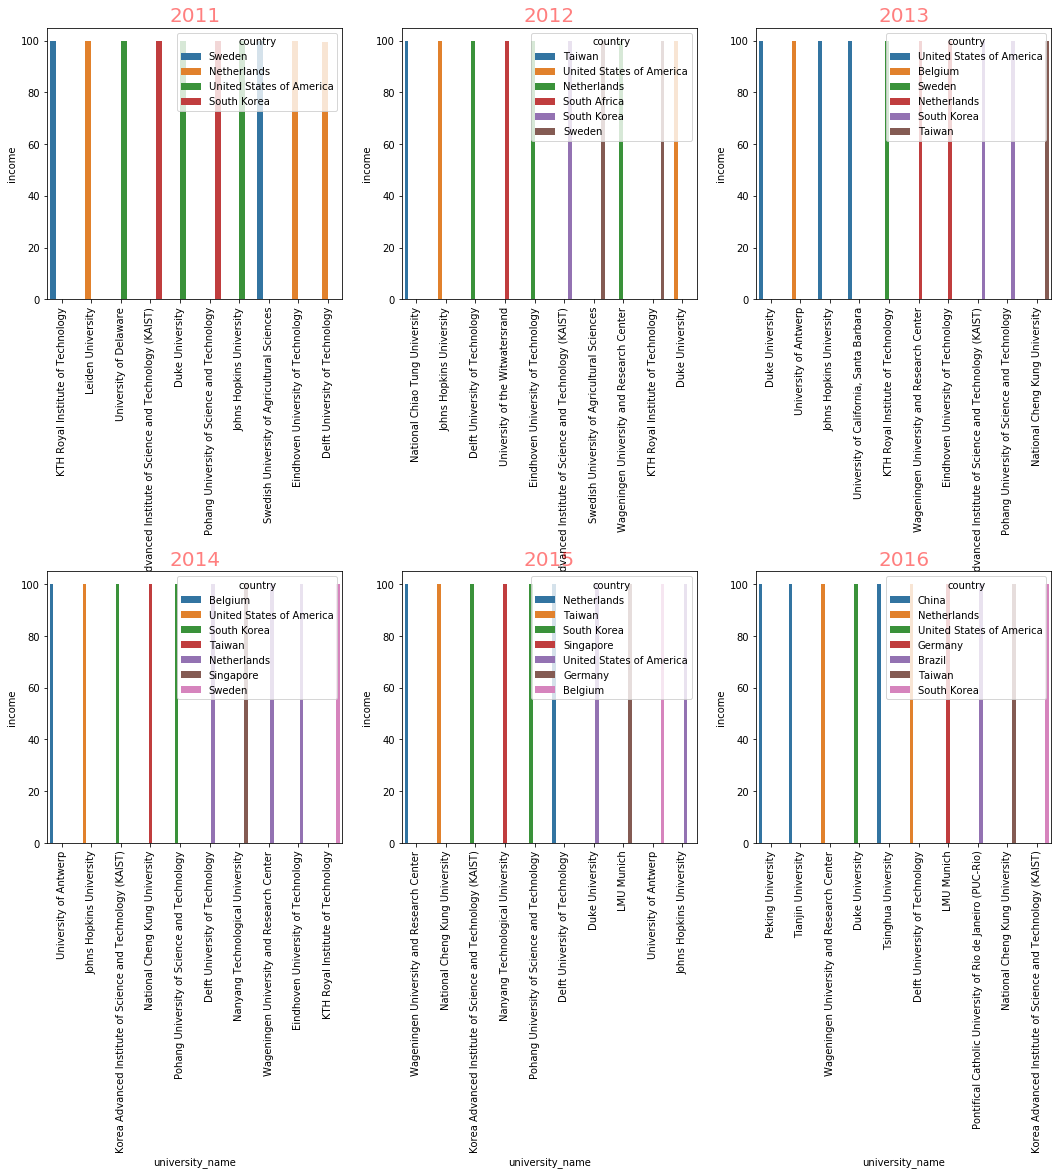

In [61]:
fig = plt.figure(figsize=(18,15))
ax = []
ax.append(fig.add_subplot(231))
ax.append(fig.add_subplot(232))
ax.append(fig.add_subplot(233))
ax.append(fig.add_subplot(234))
ax.append(fig.add_subplot(235))
ax.append(fig.add_subplot(236))
plt.subplots_adjust(hspace=1.0)

years = times_data.year.unique()
i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='university_name',y='income',data=times_data[times_data['year']==y].sort_values(['income'], ascending=False)[['university_name','country','income']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in total score

Top 10 universities in total score are from USA and UK.

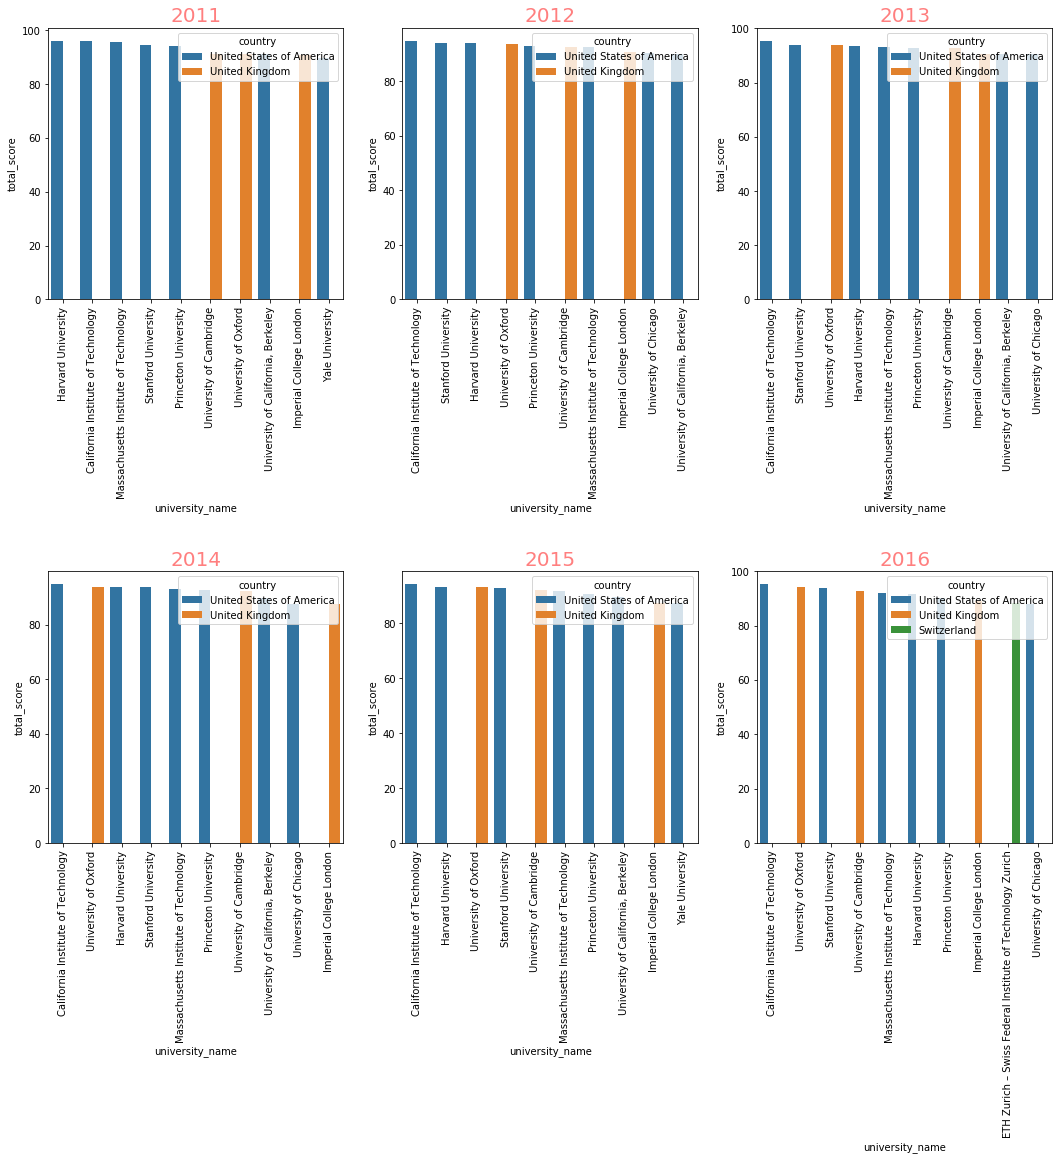

In [62]:
fig = plt.figure(figsize=(18,15))
ax = []
ax.append(fig.add_subplot(231))
ax.append(fig.add_subplot(232))
ax.append(fig.add_subplot(233))
ax.append(fig.add_subplot(234))
ax.append(fig.add_subplot(235))
ax.append(fig.add_subplot(236))
plt.subplots_adjust(hspace=1.0)

years = times_data.year.unique()
i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='university_name',y='total_score',data=times_data[times_data['year']==y].sort_values(['total_score'], ascending=False)[['university_name','country','total_score']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in number of students

USA and Italy have few institutes that are in top 10 in terms of total students intake.

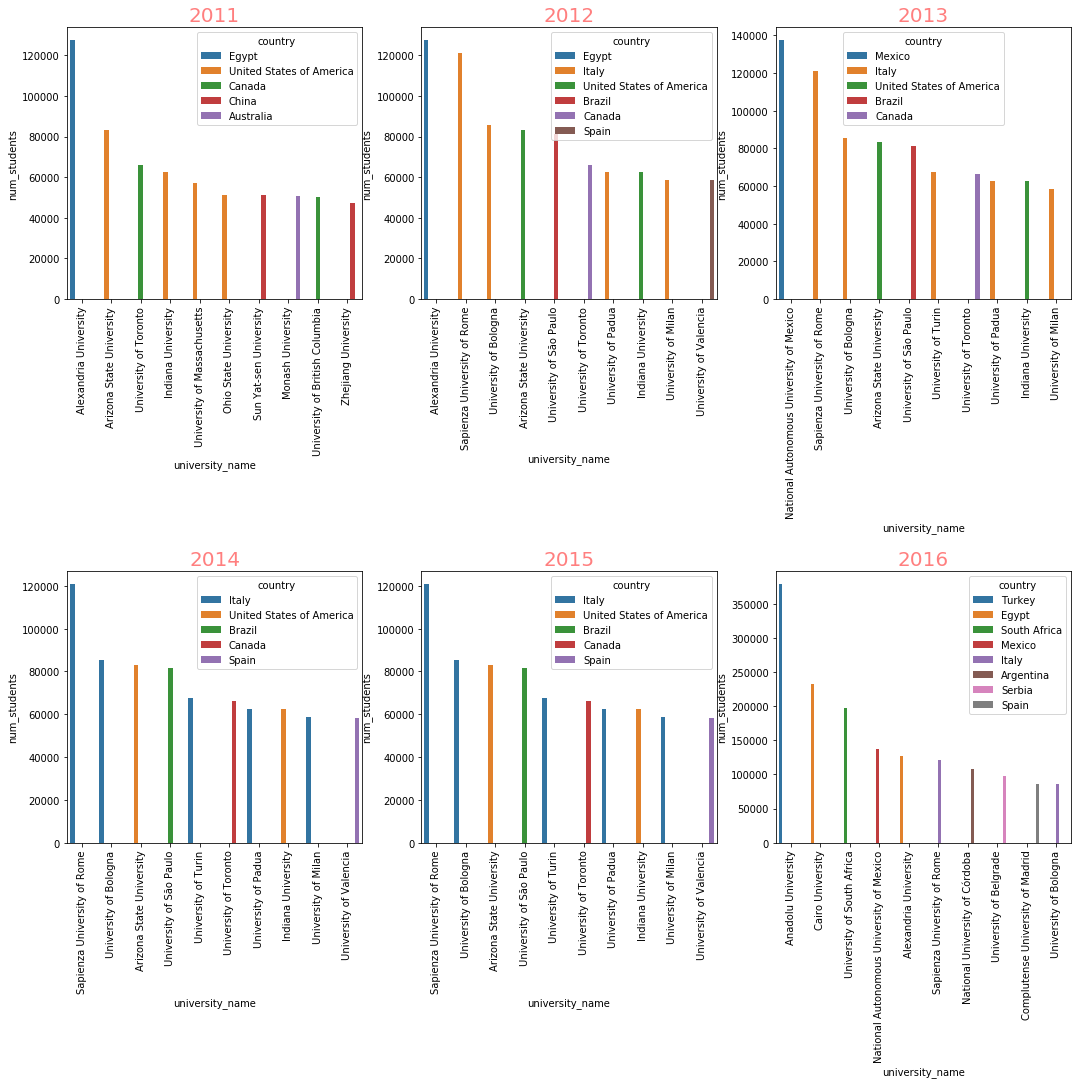

In [63]:
fig = plt.figure(figsize=(18,15))
ax = []
ax.append(fig.add_subplot(231))
ax.append(fig.add_subplot(232))
ax.append(fig.add_subplot(233))
ax.append(fig.add_subplot(234))
ax.append(fig.add_subplot(235))
ax.append(fig.add_subplot(236))
plt.subplots_adjust(hspace=1.0)

years = times_data.year.unique()
i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='university_name',y='num_students',data=times_data[times_data['year']==y].sort_values(['num_students'], ascending=False)[['university_name','country','num_students']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions in student staff ratio

USA, Japan, Sweden and Denmark have few institutes with verly low student staff ration

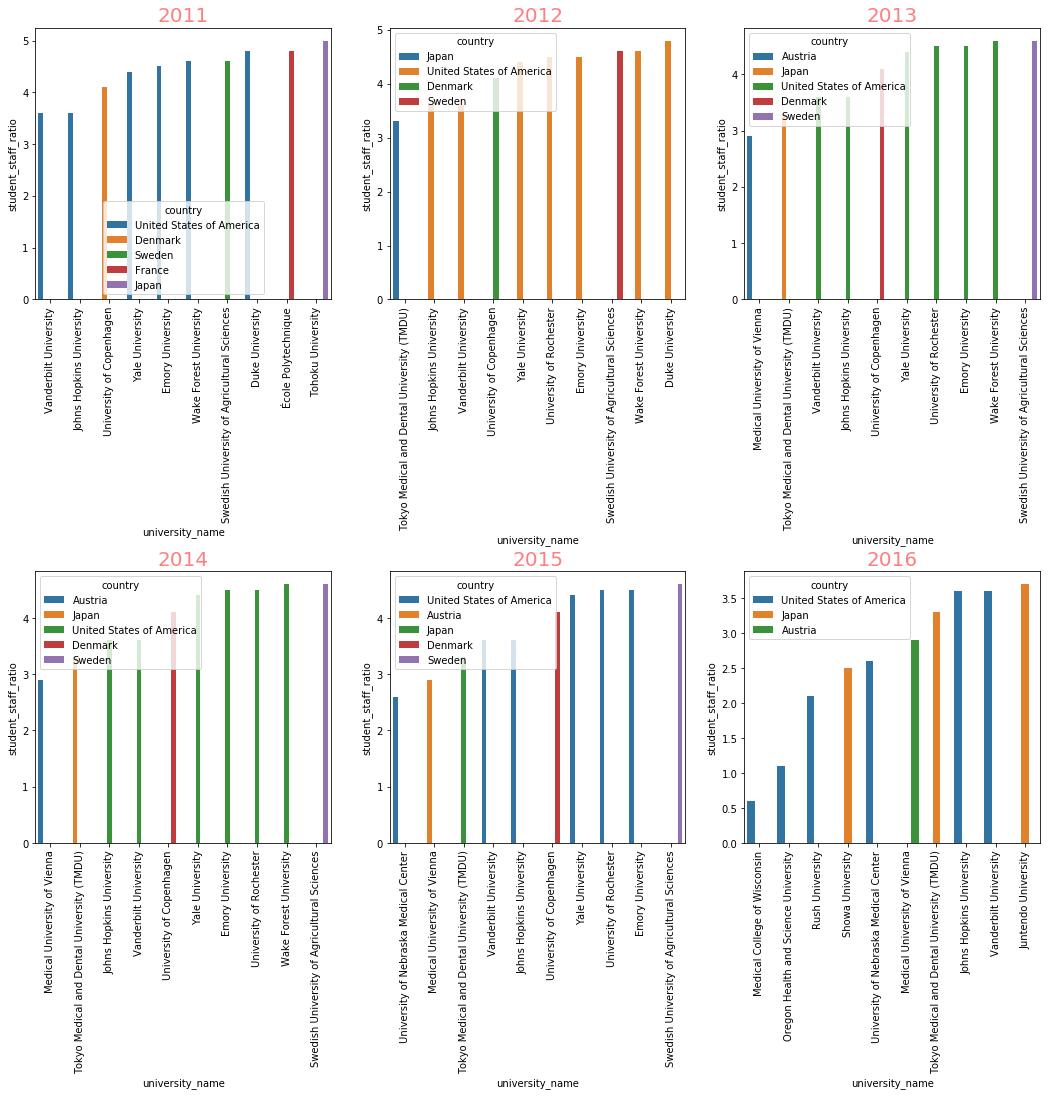

In [64]:
fig = plt.figure(figsize=(18,15))
ax = []
ax.append(fig.add_subplot(231))
ax.append(fig.add_subplot(232))
ax.append(fig.add_subplot(233))
ax.append(fig.add_subplot(234))
ax.append(fig.add_subplot(235))
ax.append(fig.add_subplot(236))
plt.subplots_adjust(hspace=1.0)

years = times_data.year.unique()
i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='university_name',y='student_staff_ratio',data=times_data[times_data['year']==y].sort_values(['student_staff_ratio'])[['university_name','country','student_staff_ratio']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

## Top 10 institutions having high percentage of international students

UK and Netherlands have high percentage of international students.

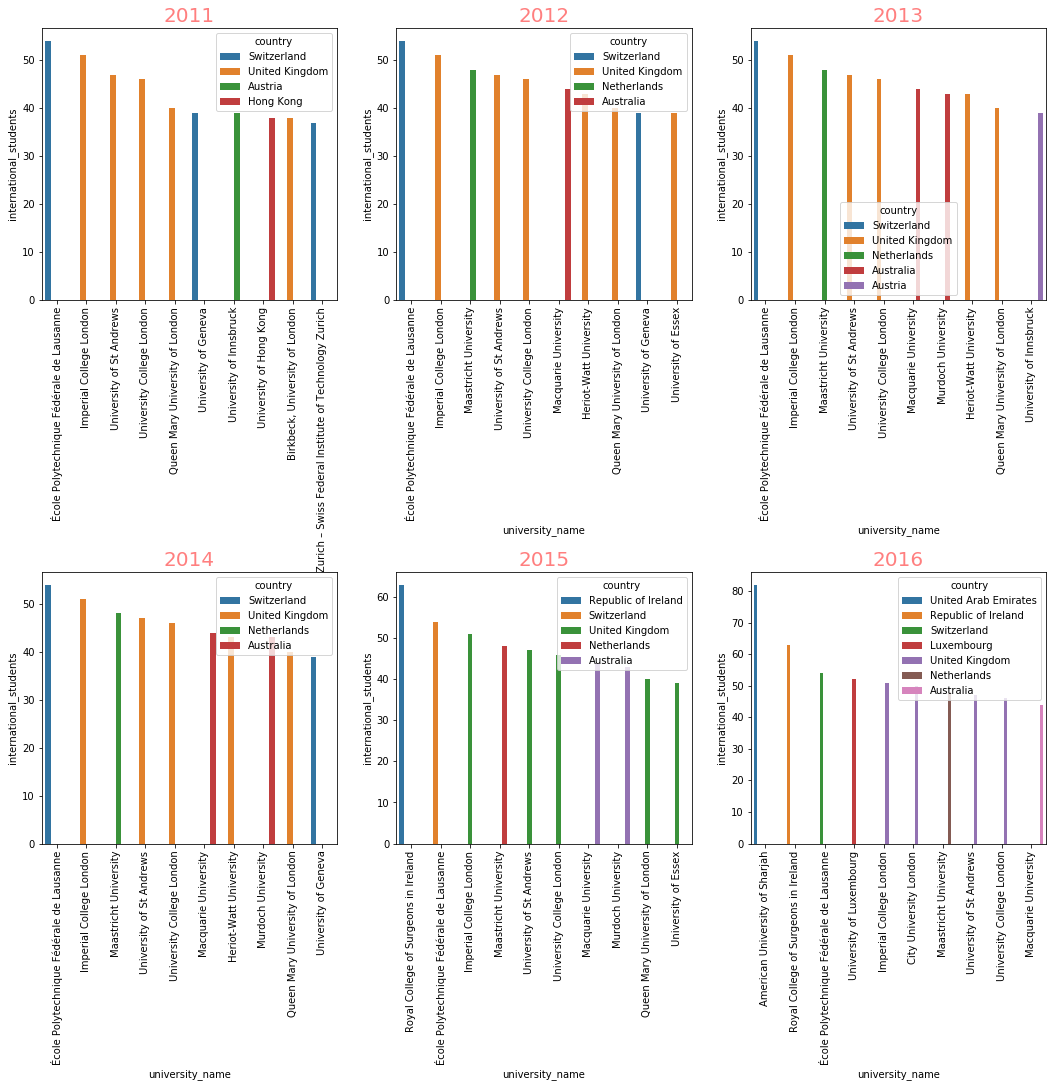

In [65]:
fig = plt.figure(figsize=(18,15))
ax = []
ax.append(fig.add_subplot(231))
ax.append(fig.add_subplot(232))
ax.append(fig.add_subplot(233))
ax.append(fig.add_subplot(234))
ax.append(fig.add_subplot(235))
ax.append(fig.add_subplot(236))
plt.subplots_adjust(hspace=1.0)

years = times_data.year.unique()
i = 0
for y in years:
    #sns.set_context('poster',font_scale=0.7)
    g = sns.barplot(x='university_name',y='international_students',data=times_data[times_data['year']==y].sort_values(['international_students'], ascending=False)[['university_name','country','international_students']].head(10), hue='country', ax=ax[i])
    g.axes.set_title(y, fontsize=20,color="r",alpha=0.5)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    i += 1

In [66]:
times_data_2011 = times_data[times_data['year']==2011][['teaching', 'international','research', 'citations', 'income',
                                                      'total_score', 'num_students','student_staff_ratio', 
                                                      'international_students', 'world_rank', 'female_male_ratio']]
times_data_2012 = times_data[times_data['year']==2012][['teaching', 'international','research', 'citations', 'income',
                                                      'total_score', 'num_students','student_staff_ratio', 
                                                      'international_students', 'world_rank', 'female_male_ratio']]
times_data_2013 = times_data[times_data['year']==2013][['teaching', 'international','research', 'citations', 'income',
                                                      'total_score', 'num_students','student_staff_ratio', 
                                                      'international_students', 'world_rank', 'female_male_ratio']]
times_data_2014 = times_data[times_data['year']==2014][['teaching', 'international','research', 'citations', 'income',
                                                      'total_score', 'num_students','student_staff_ratio', 
                                                      'international_students', 'world_rank', 'female_male_ratio']]
times_data_2015 = times_data[times_data['year']==2015][['teaching', 'international','research', 'citations', 'income',
                                                      'total_score', 'num_students','student_staff_ratio', 
                                                      'international_students', 'world_rank', 'female_male_ratio']]
times_data_2016 = times_data[times_data['year']==2016][['teaching', 'international','research', 'citations', 'income',
                                                      'total_score', 'num_students','student_staff_ratio', 
                                                      'international_students', 'world_rank', 'female_male_ratio']]


## Correlogram plot to see relation between the variables

Across all the years we see that 

* World rank is strongly negatively correlated with many variables. Citations, research, teaching and overall score drive the universities' world ranking.
* Number of students and student staff ratio are weakly associated with most of the variables. They are moderately positively correlated only to each other.
* Research is strongly positively correlated to teaching and total score. Teaching and research highly drives total score.
* International students and international are strongly positively correlated
* Female male ratio is also weakly related to most of the variables. Female male ratio, Number of students and student staff ratio do not influence total score and world ranking

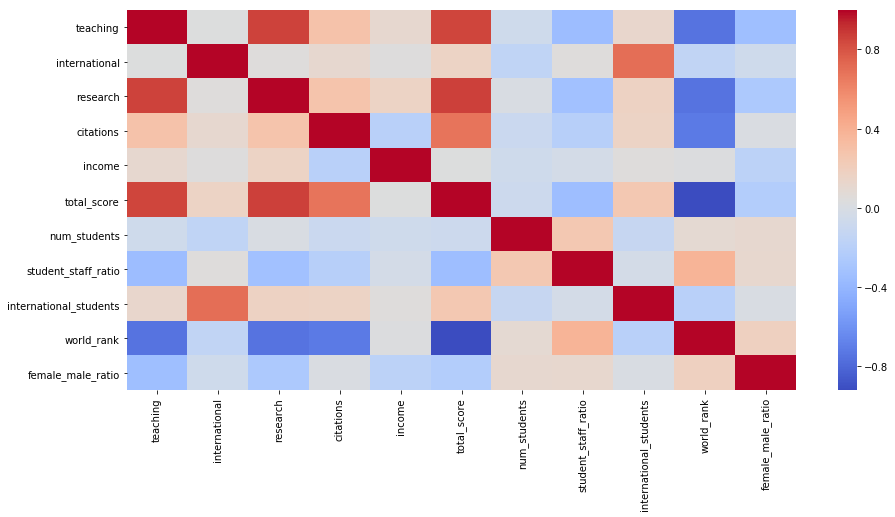

In [67]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(times_data_2011.corr(),cmap='coolwarm')

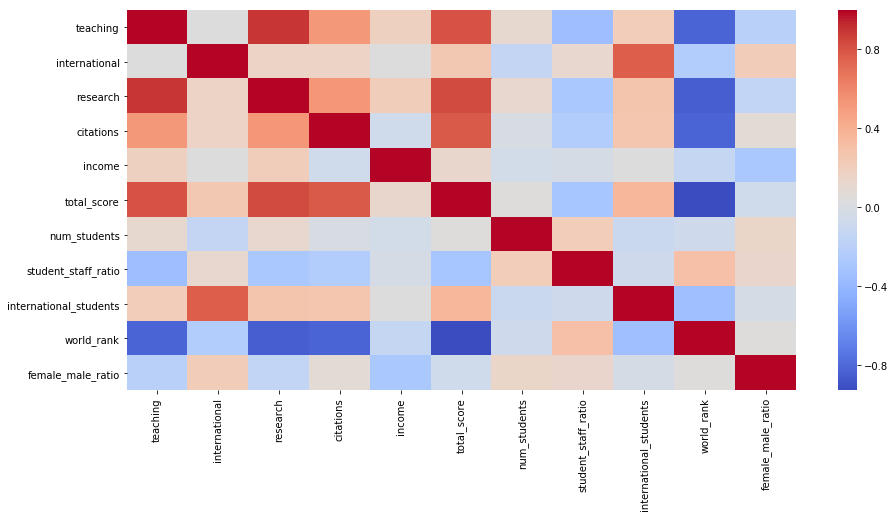

In [68]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(times_data_2012.corr(),cmap='coolwarm')

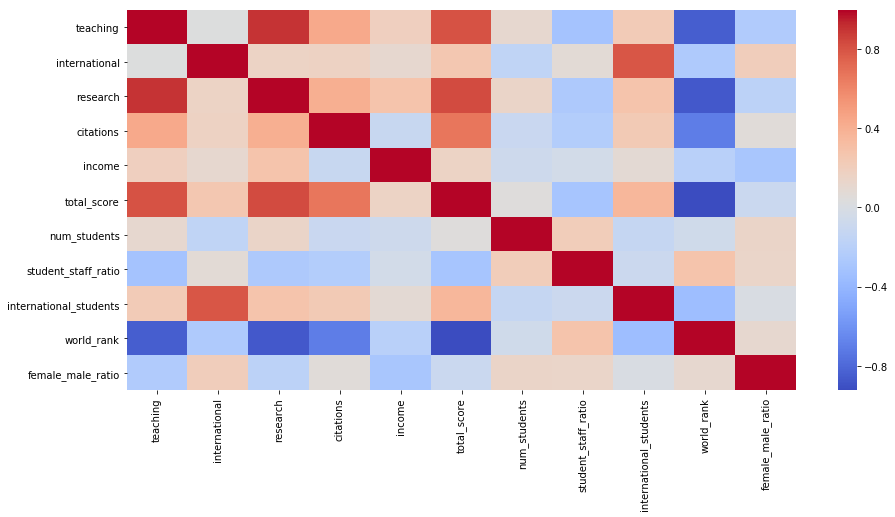

In [69]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(times_data_2013.corr(),cmap='coolwarm')

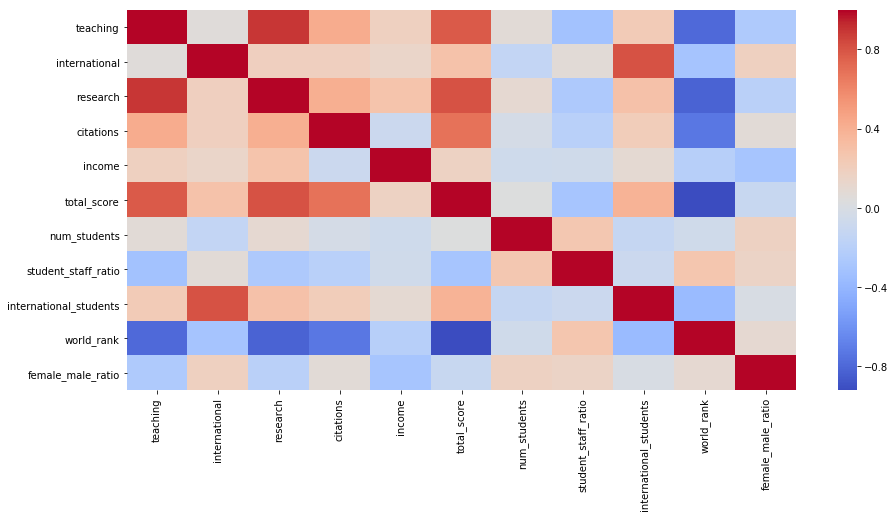

In [70]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(times_data_2014.corr(),cmap='coolwarm')

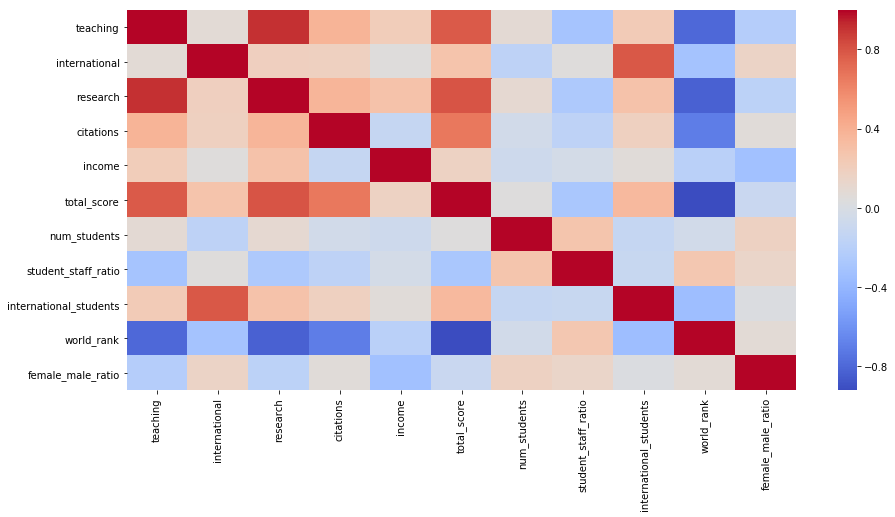

In [71]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(times_data_2015.corr(),cmap='coolwarm')

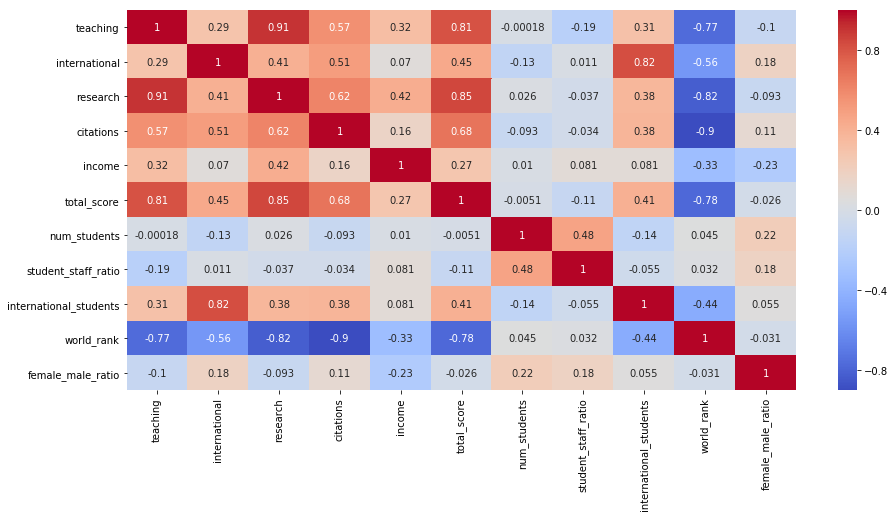

In [72]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(times_data_2016.corr(),cmap='coolwarm',annot=True)

The cluster map shows that - 
* student staff ratio and number of students are in the same group
* international students and international are in the same group
* research and teaching are in the same group
* world rank is a combination of all the factors

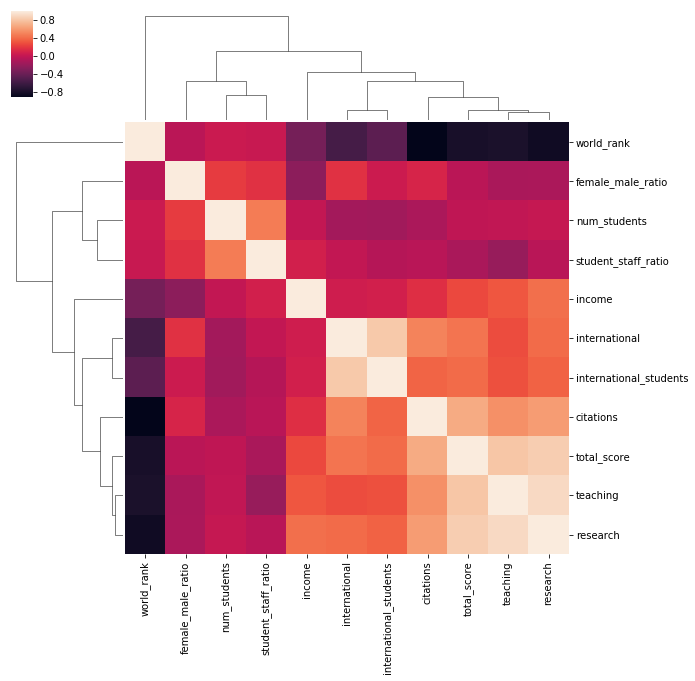

In [73]:
sns.clustermap(times_data_2016.corr())

## Heatmap showing countries and universities ranking

Across all the years we see USA tops the list with maximum number of top ranked universities. This is followed by United Kingdom. Other countries having large number of top ranked universities are Germany, Japan, Italy, Australia, France, Canada and China.

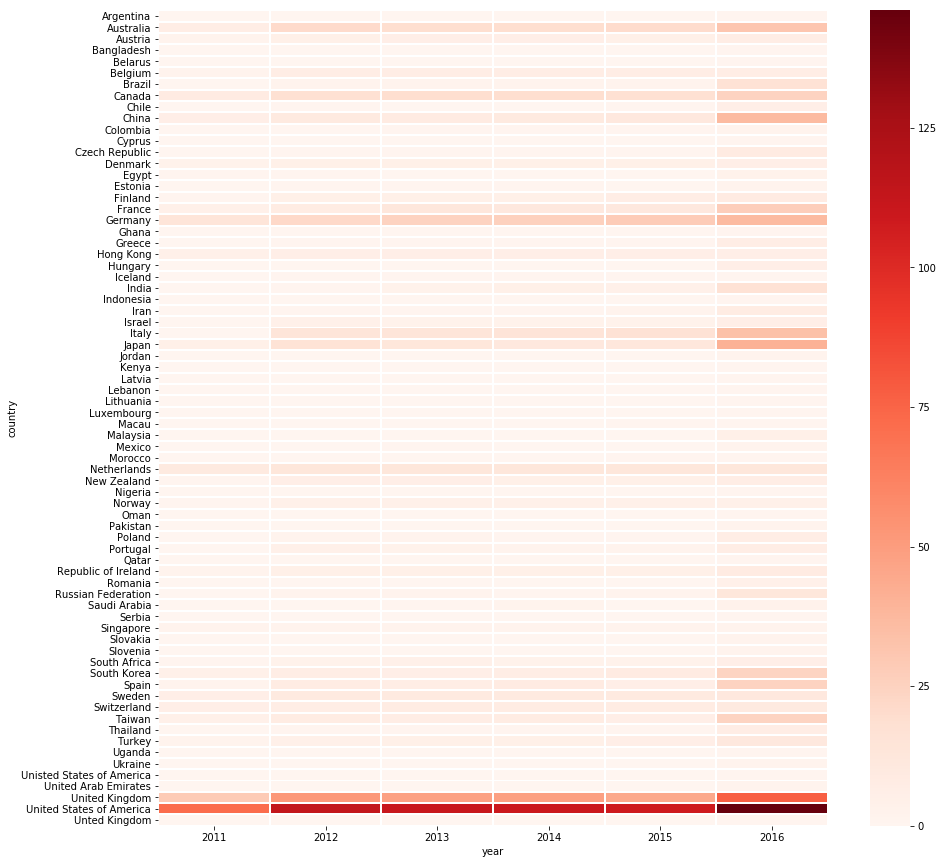

In [74]:
ctry_univ = times_data.groupby(['year','country'])['university_name'].count()
ctry_univ = pd.DataFrame(ctry_univ)
ctry_univ = ctry_univ.reset_index()
pv_ctry_univ = ctry_univ.pivot_table(values='university_name',index='country',columns='year')
pv_ctry_univ.fillna(0, inplace=True)
fig = plt.figure(figsize=(15,15))
sns.heatmap(pv_ctry_univ, cmap='Reds',linecolor='white',linewidths=1)